In [3]:
import re
import pandas as pd 

### DataBase Description

In [4]:
# Charger le fichier CSV en spécifiant les guillemets
data = pd.read_csv('data.csv', sep=';')

# Afficher les premières lignes du DataFrame
print(data.head()) 

                                                Line Category
0    اصبر قليلاً فبعد العسر تيسير وكلّ أمرٍ له وق...    الصبر
1    الأمور التي تعرفها تعادل في حجمها حفنة الرمل...  التواضع
2    البشر لن يجدوا أبر بهم ولا احنى عليهم من الل...  الرحمة 
3    الحسد أغبى الرذائل إطلاقا فإنه لا يعود على ص...    الحسد
4                  الصّبر أفضل علاج للحزن. ( بلوطس )    الصبر


In [5]:
# afficher la Taille des données
data_shape = data.shape
print(f"Taille des données : {data_shape[0]} lignes et {data_shape[1]} colonnes") 

Taille des données : 23877 lignes et 2 colonnes


In [6]:
print("Colonnes actuelles :", data.columns)


Colonnes actuelles : Index(['Line', 'Category'], dtype='object')


In [7]:
# Renommer les colonnes 'Category' et 'texte'
data.columns = ['texte','catégorie']
# afficher les Attributs
attributes = data.columns.tolist()
print("Attributs :", attributes)

Attributs : ['texte', 'catégorie']


In [8]:
# Afficher les Classes et leurs distributions
if 'catégorie' in data.columns:
    class_distribution = data['catégorie'].value_counts()
    print("Distribution des classes :")
    print(class_distribution)
else:
    print("Aucune colonne 'catégorie' trouvée.")

# 4. Nombre de classes
if 'catégorie' in data.columns:
    num_classes = data['catégorie'].nunique()
    print(f"Nombre de classes : {num_classes}")
else:
    print("Aucune colonne 'catégorie' trouvée.")

Distribution des classes :
catégorie
الصبر                905
الرحمة               758
الشجاعة              639
التودد               616
التغافل              589
                    ... 
جمال الروح             1
 حسن السمت             1
الاحترام والتوقير      1
السب والشتم            1
الوفاء                 1
Name: count, Length: 141, dtype: int64
Nombre de classes : 141


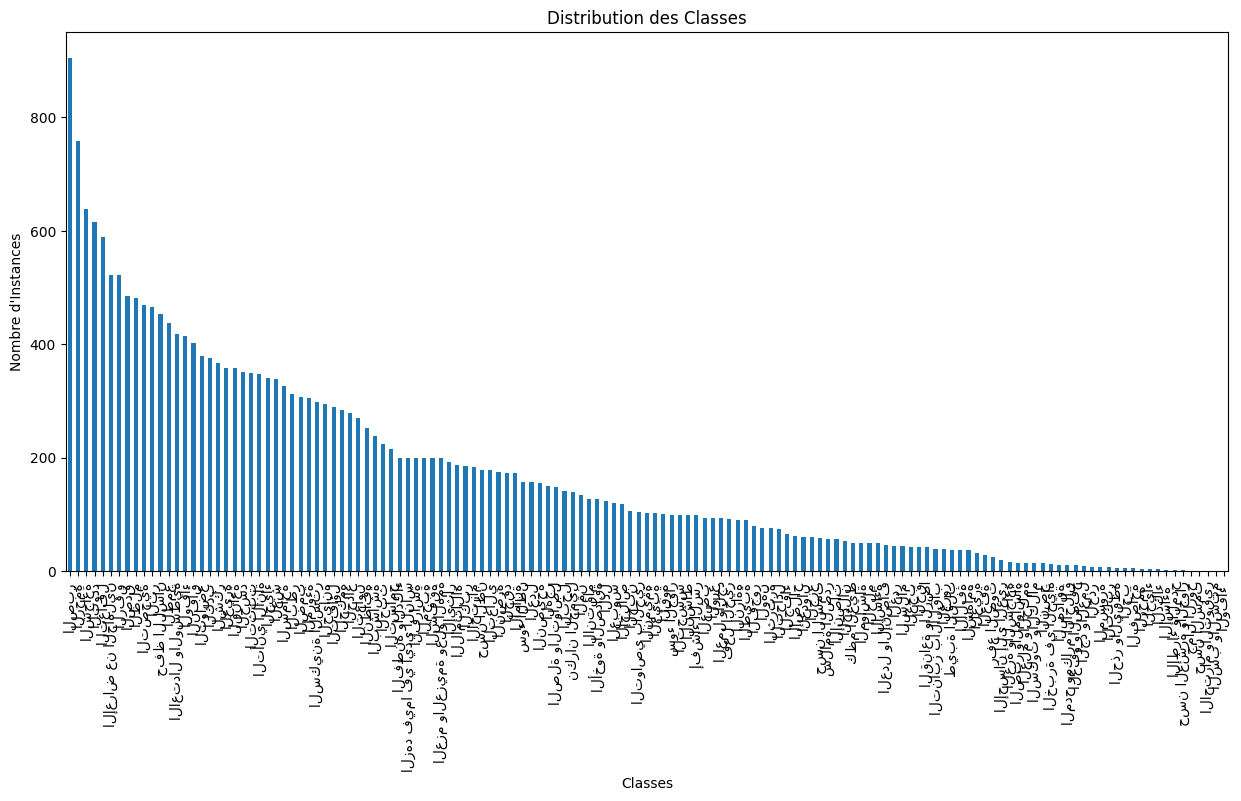

In [10]:
import matplotlib.pyplot as plt

# Visualisation de la distribution des classes
class_distribution.plot(kind='bar', figsize=(15, 7))
plt.title("Distribution des Classes")
plt.xlabel("Classes")
plt.ylabel("Nombre d'Instances")
plt.xticks(rotation=90)  # Rotation des étiquettes pour une meilleure lisibilité
plt.show()

### Étude spécifique des classes minoritaires

### 1/Ratio

In [11]:
# Calcul du ratio de déséquilibre
majority_class_count = class_distribution.max()
minority_class_count = class_distribution.min()
ratio = majority_class_count / minority_class_count
print(f"Ratio de déséquilibre des classes : {ratio}") 

Ratio de déséquilibre des classes : 905.0


* Résultat: signifie que la classe majoritaire est 905 fois plus fréquente que la classe minoritaire.

* Interprétation: 
Un ratio aussi élevé indique un déséquilibre extrême dans la distribution des classes

Cela peut poser des problèmes pour les modèles d'apprentissage automatique, car ils risquent de favoriser fortement la classe majoritaire et de négliger la classe minoritaire.

### 2/L'écart Type

In [12]:
# Calcul de l'écart entre la classe majoritaire et minoritaire
class_diff = majority_class_count - minority_class_count
print(f"Écart absolu entre la classe majoritaire et la minoritaire : {class_diff}")

Écart absolu entre la classe majoritaire et la minoritaire : 904


* Résultat: class_diff = 904, ce qui montre que la classe majoritaire compte 904 instances de plus que la classe minoritaire.

* Interprétation: Un écart aussi important confirme encore une fois le déséquilibre des classes.

### 3/Distribution des classes Minoritaires

### 3.1/ Moyenne de la distribution des classes

La moyenne de distribution représente la fréquence moyenne d'apparition des classes dans votre jeu de données.



In [13]:
# calculer la moyenne de la distribution des classes
mean_distribution = class_distribution.mean()
print('mean_distribution: ',mean_distribution)

mean_distribution:  169.3404255319149


Résultat: Cela signifie que, en moyenne, chaque classe contient environ 169 instances.

Interprétation: Si certaines classes sont significativement au-dessus ou en dessous de cette moyenne, cela indique un déséquilibre dans la distribution des classes.

### 3.2/Visualisation des Classes Minoritaires : Analyse de la Distribution Sous le Seuil de Fréquence

In [14]:
threshold = mean_distribution * 0.5  # Ajustez ici si nécessaire
print(f"Moyenne des distributions : {mean_distribution}")
print(f"Seuil utilisé (50% de la moyenne) : {threshold}")

Moyenne des distributions : 169.3404255319149
Seuil utilisé (50% de la moyenne) : 84.67021276595744


In [15]:
# Afficher les classes proches du seuil

close_to_threshold = class_distribution[
    (class_distribution >= threshold * 0.9) & (class_distribution < threshold)
]
print("Classes proches du seuil :")
print(close_to_threshold)

Classes proches du seuil :
catégorie
الفجور    79
الوهن     77
Name: count, dtype: int64


________________________
Interprétation:

.Les classes الفجور et الوهن sont juste en dessous du seuil des classes minoritaires.
    
.Elles ne sont pas encore dans la catégorie "minoritaire sévère" mais elles s'en approchent dangereusement.
    
.Elles nécessitent une surveillance particulière, car elles risquent de devenir des classes très sous-représentées si aucune action corrective n'est prise.

C:\Users\21655\AppData\Local\Temp\ipykernel_29240\1096799912.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=minority_classes.index, y=minority_classes.values, palette="coolwarm")


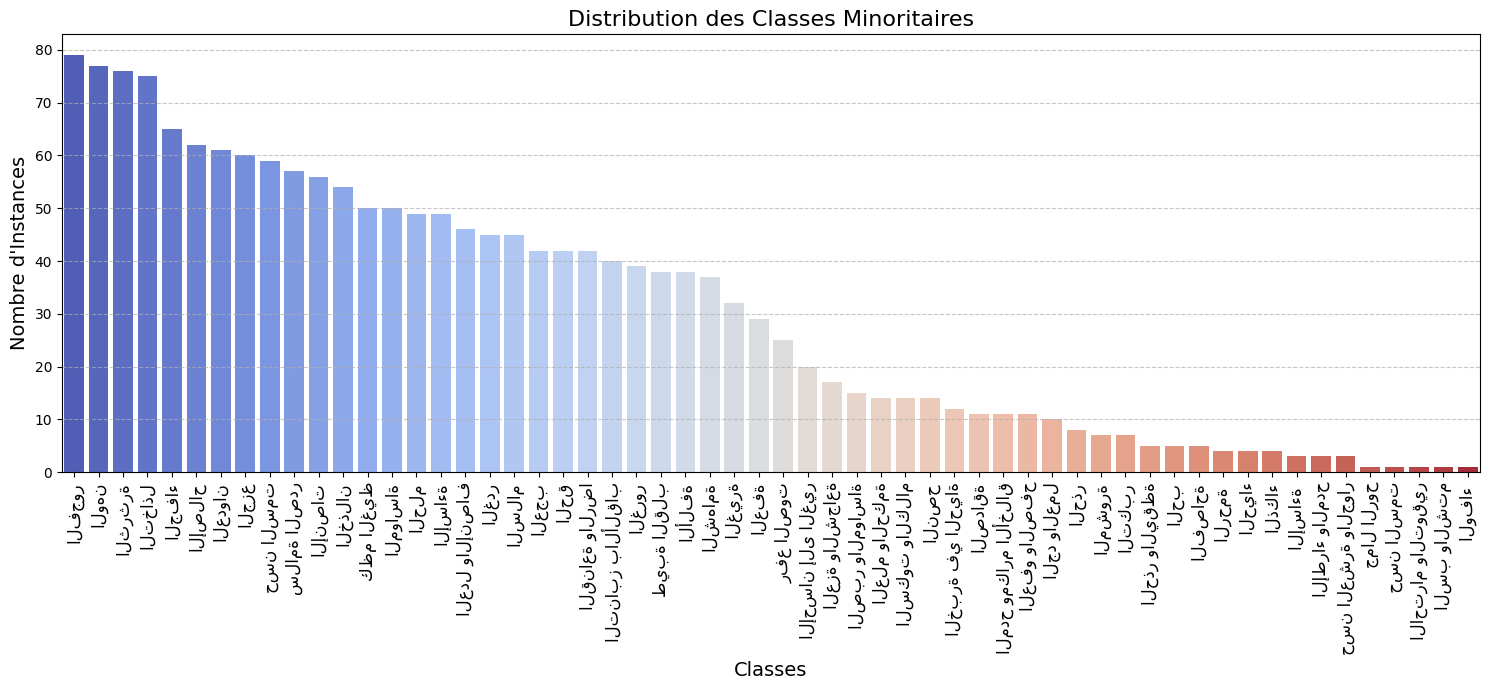

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrage des classes minoritaires

minority_classes = class_distribution[class_distribution < threshold]

# Création du graphique
plt.figure(figsize=(15, 7))
sns.barplot(x=minority_classes.index, y=minority_classes.values, palette="coolwarm")
plt.title("Distribution des Classes Minoritaires", fontsize=16)
plt.xlabel("Classes", fontsize=14)
plt.ylabel("Nombre d'Instances", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Tendances observée :

.On remarque une réduction progressive du nombre d'instances des classes minoritaires de gauche à droite.

.Les classes à gauche (teintes bleues foncées) sont les moins minoritaires, c'est-à-dire celles qui se rapprochent du seuil, tandis que les classes à droite (teintes rouges) sont les plus sous-représentées.

In [17]:
# Compter les classes minoritaires
print("Classes minoritaires :")
print(minority_classes)

num_minority_classes = len(minority_classes)
print(f"Nombre total de classes minoritaires : {num_minority_classes}")

Classes minoritaires :
catégorie
الفجور                  79
الوهن                   77
الثرثرة                 76
التخاذل                 75
الجفاء                  65
الإصلاح                 62
العدوان                 61
الجزع                   60
حسن السمت               59
سلامة الصدر             57
الإنصات                 56
الخذلان                 54
كظم الغيظ               50
المواساة                50
الحلم                   49
الإساءة                 49
العدل والإنصاف          46
الغدر                   45
السلام                  45
العجب                   42
الحق                    42
القناعة والرضا          42
التنابز بالألقاب        40
الغرور                  39
طيبة القلب              38
الألفة                  38
الشهامة                 37
 الغيرة                 32
العفة                   29
رفع الصوت               25
الإحسان إلى الغير       20
العزة والشجاعة          17
الصبر والمواساة         15
العلم والحكمة           14
السكوت والكلام          14
النصح                 

### 4/ Histogramme de la Distribution des classes avec Seuil

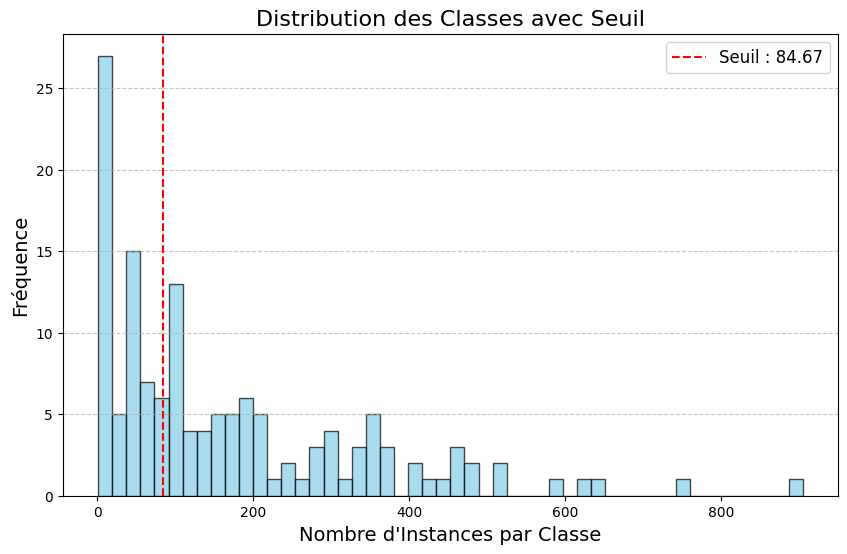

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(class_distribution, bins=50, color="skyblue", alpha=0.7, edgecolor="black")
plt.axvline(x=threshold, color="red", linestyle="--", label=f"Seuil : {threshold:.2f}")
plt.title("Distribution des Classes avec Seuil", fontsize=16)
plt.xlabel("Nombre d'Instances par Classe", fontsize=14)
plt.ylabel("Fréquence", fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Interprétation globale:

Axe x indique le nombre d'instances par classe, tandis que l'axe y montre la fréquence (nombre de classes ayant une certaine valeur d'instances).

L'histogramme signifie qu'il existe beaucoup de classes minoritaires avec un nombre d'instances inférieur au seuil. 

### 5/ Gini Index

In [19]:
# Calcul de l'Index de Gini
class_probabilities = class_distribution / class_distribution.sum()
gini_index = 1 - (class_probabilities**2).sum()
print(f"Index de Gini : {gini_index}") 

Index de Gini : 0.9854819655695582


explication du résultat:

L'Index de Gini calculé est de 0.9707, ce qui indique une forte inégalité dans la distribution des classes. Un indice de Gini proche de 1 signifie que la distribution est extrêmement déséquilibrée

### Prétraitement

### 1/ Valeurs manquantes

In [20]:
# Calcul du nombre de valeurs manquantes par colonne
missing_values_per_column = data.isnull().sum()
print("Nombre de valeurs manquantes par colonne :")
print(missing_values_per_column)

# Calcul du nombre total de valeurs manquantes dans le DataFrame
total_missing_values = data.isnull().sum().sum()
print(f"Nombre total de cases vides : {total_missing_values}")

Nombre de valeurs manquantes par colonne :
texte        0
catégorie    0
dtype: int64
Nombre total de cases vides : 0


### 2/ Suppression de mots anglais

In [22]:
# Fonction pour détecter les mots en anglais dans une ligne
def detect_english_words(text):
    # Motif pour détecter les mots en anglais (lettres anglaises uniquement)
    english_word_pattern = re.compile(r'\b[a-zA-Z]+\b')
    # Trouver tous les mots en anglais dans le texte
    english_words = english_word_pattern.findall(text)
    return english_words if english_words else None

# Appliquer la fonction pour détecter les mots en anglais sur chaque ligne
data['english_words'] = data['texte'].apply(detect_english_words)

# Filtrer et afficher les lignes qui contiennent des mots en anglais
lines_with_english = data[data['english_words'].notnull()]
if not lines_with_english.empty:
    print("Lignes contenant des mots en anglais avant suppression :")
    for index, row in lines_with_english.iterrows():
        print(f"Ligne {index}: {row['english_words']}")
else:
    print("Aucun mot en anglais détecté dans le texte.")

# Fonction pour supprimer les mots en anglais
def remove_english_words(text):
    # Motif pour détecter les mots en anglais (lettres anglaises uniquement)
    english_word_pattern = re.compile(r'\b[a-zA-Z]+\b')
    # Remplacer les mots en anglais par une chaîne vide
    cleaned_text = re.sub(english_word_pattern, '', text)
    return cleaned_text

# Appliquer la suppression des mots en anglais sur chaque texte
data['texte'] = data['texte'].apply(remove_english_words)

# Supprimer la colonne temporaire 'english_words' seulement si elle existe
if 'english_words' in data.columns:
    data = data.drop(columns=['english_words'])

# Afficher les premières lignes pour vérifier les changements
print("\nDonnées après suppression des mots en anglais :")
print(data.head())
# Écraser le fichier Excel d'origine avec les modifications
data.to_excel('Supprimer les mots écrites en anglais.xlsx', index=False)
print("Les données modifiées ont été sauvegardées dans 'Supprimer les mots écrites en anglais.xlsx'.")

Aucun mot en anglais détecté dans le texte.

Données après suppression des mots en anglais :
                                               texte catégorie
0    اصبر قليلاً فبعد العسر تيسير وكلّ أمرٍ له وق...     الصبر
1    الأمور التي تعرفها تعادل في حجمها حفنة الرمل...   التواضع
2    البشر لن يجدوا أبر بهم ولا احنى عليهم من الل...   الرحمة 
3    الحسد أغبى الرذائل إطلاقا فإنه لا يعود على ص...     الحسد
4                  الصّبر أفضل علاج للحزن. ( بلوطس )     الصبر
Les données modifiées ont été sauvegardées dans 'Supprimer les mots écrites en anglais.xlsx'.


### 3/Suppression des phrases insignifiantes

### 3.1 Analyser la distribution des longueurs des phrases

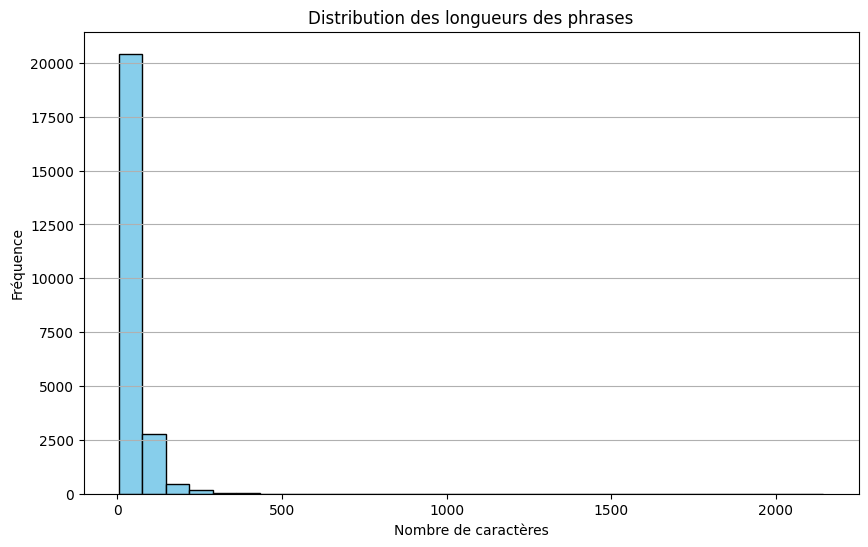

In [23]:
data = pd.read_excel('Supprimer les mots écrites en anglais.xlsx')

# Calculer le nombre de caractères pour chaque ligne
data['caractères'] = data['texte'].apply(len)

# Afficher un histogramme des longueurs de texte
plt.figure(figsize=(10, 6))
plt.hist(data['caractères'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Nombre de caractères')
plt.ylabel('Fréquence')
plt.title('Distribution des longueurs des phrases')
plt.grid(axis='y')
plt.show()


### 3.2/Calculer des mesures statistiques : moyenne et écart-type

In [28]:
import numpy as np

# Calculer la moyenne et l'écart-type des longueurs des phrases
mean_length = np.mean(data['caractères'])
std_length = np.std(data['caractères'])

print(f"Moyenne des longueurs : {mean_length:.2f}")
print(f"Écart-type des longueurs : {std_length:.2f}")

Moyenne des longueurs : 52.02
Écart-type des longueurs : 48.09


### 3.3/Définir une plage de longueurs significative

Explication de Cette l'étape:conserver les phrases dont la longueur des caractères se situe autour de la moyenne ± écart-type.

Cela filtre les phrases anormales trop courtes ou trop longues.

In [29]:
# Définir les seuils bas et haut autour de la moyenne ± écart-type
lower_bound = mean_length - std_length
upper_bound = mean_length + std_length

print(f"Seuil inférieur : {lower_bound:.2f}")
print(f"Seuil supérieur : {upper_bound:.2f}")

# Filtrer les lignes qui respectent cette plage
filtered_data = data[(data['caractères'] >= lower_bound) & (data['caractères'] <= upper_bound)]

# Afficher les résultats
print(f"Nombre de lignes conservées : {len(filtered_data)}")
print(f"Nombre de lignes supprimées : {len(data) - len(filtered_data)}")


Seuil inférieur : 3.94
Seuil supérieur : 100.11
Nombre de lignes conservées : 22054
Nombre de lignes supprimées : 1823


### 3.4/ Supprimer les lignes hors seuil

In [30]:
# Supprimer les lignes en dehors de la plage
data = data[(data['caractères'] >= lower_bound) & (data['caractères'] <= upper_bound)]

# Sauvegarder les données nettoyées
data = data.drop(columns=['caractères'])  # Optionnel : supprimer la colonne 'caractères'
data.to_excel('Textes_Filtrés.xlsx', index=False)

print("Les textes filtrés ont été sauvegardés dans 'Textes_Filtrés.xlsx'.")

Les textes filtrés ont été sauvegardés dans 'Textes_Filtrés.xlsx'.


### 4/Suppression des Chiffres

In [25]:
import pandas as pd
import re

# Initialiser des listes pour les indices
digit_indices = []  # Liste pour les indices des lignes avec des chiffres

# Lire le fichier Excel
data = pd.read_excel('Textes_Filtrés.xlsx')

# Définir une fonction pour vérifier les chiffres
def check_for_digits(row, index):
    texte = str(row['texte'])
    categorie = str(row['catégorie'])
    
    # Vérifie les chiffres dans les deux colonnes
    if re.search(r'[0-9٠-٩]', texte) or re.search(r'[0-9٠-٩]', categorie):
        digit_indices.append(index)  # Ajouter l'indice ajusté à la liste

# Appliquer la vérification sur chaque ligne
for index, row in data.iterrows():
    check_for_digits(row, index)

# Afficher les indices des lignes avec des chiffres
print(f"Indices des lignes avec des chiffres : {digit_indices}")

# Fonction pour supprimer les chiffres d'un texte
def remove_digits(text):
    return re.sub(r'[0-9٠-٩]', '', text)  # Supprime les chiffres

# Appliquer la suppression des chiffres sur les lignes concernées
for index in digit_indices:
    # Vérifier si l'indice est dans la plage de DataFrame
    if index - 2 < len(data):  # -2 pour ajuster l'indice à l'index du DataFrame
        data.at[index, 'texte'] = remove_digits(data.at[index, 'texte'])
        data.at[index, 'catégorie'] = remove_digits(data.at[index, 'catégorie'])

# Enregistrer les modifications dans le fichier Excel
data.to_excel('Supprimer les chiffres.xlsx', index=False)
print("Les chiffres ont été supprimés et les modifications ont été enregistrées dans 'Supprimer les chiffres.xlsx'.")


Indices des lignes avec des chiffres : [436, 437, 438, 439, 594, 595, 596, 597, 598, 599, 600, 601, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 1892, 1895, 14386, 17348, 17349, 17350, 17351]
Les chiffres ont été supprimés et les modifications ont été enregistrées dans 'Supprimer les chiffres.xlsx'.


### 5/ Suppressions des symboles et des caractères spéciaux

In [26]:
import pandas as pd
import re

# Charger les données à partir d'un fichier Excel
data = pd.read_excel('Supprimer les chiffres.xlsx')

# Définir une expression régulière pour capturer tous les caractères spéciaux et symboles
special_characters_regex = r'[…،+\-×÷=<>≤≥√$€£¥₹.,;:?!\"\'≈≠≡⊂⊃&@#%*^~°\'´`{}|\/␣•©®™§]'
# Liste pour stocker les indices avec des caractères spéciaux
special_character_indices = []

# Vérifier chaque ligne dans les colonnes 'texte' et 'catégorie'
for index, row in data.iterrows():
    texte = row['texte']
    catégorie = row['catégorie']
    
    # Vérifier si le texte ou la catégorie contient des caractères spéciaux
    if re.search(special_characters_regex, texte) or re.search(special_characters_regex, catégorie):
        special_character_indices.append(index)  # Ajouter l'index directement

        # Supprimer les caractères spéciaux dans le texte
        data.at[index, 'texte'] = re.sub(special_characters_regex, '', texte)

# Lister les caractères spéciaux trouvés
special_characters_found = set()

for index in special_character_indices:
    texte = data.at[index, 'texte']
    catégorie = data.at[index, 'catégorie']
    
    # Trouver les caractères spéciaux dans le texte
    special_characters_found.update(re.findall(special_characters_regex, texte))
    special_characters_found.update(re.findall(special_characters_regex, catégorie))

# Afficher les caractères spéciaux trouvés
print("Caractères spéciaux trouvés :", special_characters_found)

# Enregistrer les modifications dans le fichier Excel
data.to_excel('Supprimer Les symboles et les Caractères spéciaux.xlsx', index=False)


Caractères spéciaux trouvés : set()


### 6/Suppression des espaces consécutifs et des caractères Non arabe

In [27]:
import pandas as pd
import re

# Charger les données à partir d'un fichier Excel
data = pd.read_excel('Supprimer les chiffres.xlsx')

# Définir une expression régulière pour capturer tout ce qui n'est pas un caractère arabe ni un espace
arabic_characters_regex = r'[^\u0600-\u06FF\s]'  # Cette regex capture tout ce qui n'est pas une lettre arabe ni un espace

# Fonction pour remplacer les espaces multiples par un seul espace
def remove_multiple_spaces(text):
    return re.sub(r'\s+', ' ', text)  # Remplace les espaces multiples par un seul espace

special_character_indices = []

# Vérifier chaque ligne dans les colonnes 'texte' et 'catégorie'
for index, row in data.iterrows():
    texte = row['texte']
    catégorie = row['catégorie']
    
    # Vérifier si le texte ou la catégorie contient des caractères non arabes
    if re.search(arabic_characters_regex, texte) or re.search(arabic_characters_regex, catégorie):
        special_character_indices.append(index)  # Ajouter l'index directement

        # Supprimer les caractères non arabes dans le texte
        texte = re.sub(arabic_characters_regex, '', texte)
        catégorie = re.sub(arabic_characters_regex, '', catégorie)

        # Remplacer les espaces multiples par un seul espace
        texte = remove_multiple_spaces(texte)
        catégorie = remove_multiple_spaces(catégorie)

        # Mettre à jour les colonnes avec le texte nettoyé
        data.at[index, 'texte'] = texte
        data.at[index, 'catégorie'] = catégorie

# Lister les caractères non arabes trouvés
special_characters_found = set()

for index in special_character_indices:
    texte = data.at[index, 'texte']
    catégorie = data.at[index, 'catégorie']
    
    # Trouver les caractères non arabes dans le texte
    special_characters_found.update(re.findall(arabic_characters_regex, texte))
    special_characters_found.update(re.findall(arabic_characters_regex, catégorie))

# Afficher les caractères non arabes trouvés
print("Caractères non arabes trouvés :", special_characters_found)


Caractères non arabes trouvés : set()


In [28]:
# Enregistrer les modifications dans le fichier Excel
data.to_excel('Supprimer Les caractères non arabes et espaces multiples.xlsx', index=False)

### 7/ Tokenisation

Description de cette partie: La tokenisation est le processus de découper un texte en unités plus petites appelées "tokens", comme des mots. Cela permet aux algorithmes de traitement du langage naturel (NLP) de mieux comprendre et analyser le texte en le transformant en une forme exploitable.
C'est une partie essentielle car elle permet de structurer le texte brut pour qu'il soit compréhensible par les machines, facilitant ainsi notre tâches de classification de texte

### 7.1/Méthode word_tokenize de la bibliothèque NLTK (Natural Language Toolkit)

In [29]:
data = pd.read_excel('Supprimer Les caractères non arabes et espaces multiples.xlsx')
# Vérifier le type des données dans chaque colonne
print(data['texte'].apply(type).unique())
print(data['catégorie'].apply(type).unique())

[<class 'str'>]
[<class 'str'>]


In [30]:
import nltk
from nltk.tokenize import word_tokenize

# Téléchargez les ressources nécessaires si ce n'est pas déjà fait
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
# Fonction de tokenisation pour un texte arabe (en utilisant nltk)
def tokenize_arabic_text_nltk(text):
    # Assurez-vous que le texte n'est pas vide ou NaN
    if isinstance(text, str):
        return word_tokenize(text)
    else:
        return []

# Appliquer la tokenisation sur la colonne 'texte'
data['texte'] = data['texte'].apply(tokenize_arabic_text_nltk)
# Vérifier le type de la première entrée dans 'texte' après tokenisation
print(type(data['texte'].iloc[0]))

<class 'list'>


### 7.2/suppression des lignes avec des listes de tokens vides

In [32]:
# Boucle sur les lignes du DataFrame et suppression des lignes avec des listes vides
data = data[data['texte'].apply(lambda x: len(x) > 0)]  # Garder uniquement les lignes où 'texte' n'est pas une liste vide

# Vérifier les résultats
print(f"Nombre de lignes après suppression : {len(data)}")
print(type(data['texte'].iloc[0]))
# Sauvegarder les colonnes 'tokenized_text' et 'catégorie' dans un nouveau DataFrame
data= data[['texte', 'catégorie']]

# Enregistrer le DataFrame dans un nouveau fichier Excel
data.to_excel('tokenized_data.xlsx', index=False)

# Afficher un message de confirmation
print("Les données ont été sauvegardées dans 'tokenized_data.xlsx'.")
print(data['texte'].apply(type).unique())

Nombre de lignes après suppression : 21646
<class 'list'>
Les données ont été sauvegardées dans 'tokenized_data.xlsx'.
[<class 'list'>]


### 8/ Suppression des Stop Words

Description de cette étape: La suppression des stop words est le processus de retrait des mots fréquents et peu informatifs dans un texte

In [34]:
import ast
data = pd.read_excel('tokenized_data.xlsx')
# Appliquer la conversion pour chaque ligne de la colonne 'texte'
data['texte'] = data['texte'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Vérifier si la conversion a fonctionné
print(type(data['texte'].iloc[0]))  # Cela devrait être une liste

<class 'list'>


### 8.1/Téléchargement des Stopwords d'Arabic

In [35]:
import nltk
from nltk.corpus import stopwords
# Télécharger les stop words si nécessaire
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
# Charger les stop words en arabe
stop_words = set(stopwords.words('arabic'))

### 8.2/ Stop_words personnalisés

In [37]:
stop_words_personnalises = {
    "أ","لكنه" ,"أبدا", "أثناء", "آخر", "آخرون",'ا', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ي', 'ان', 'لم', 'ل', 'ا', 'فا', 'د', 'را', 'ن', 'لم', 'م', 'غ', 'غا', "أخرى", "أصبح", "أصبح", "أصلا", "أضحى", "أغلب", 
    "أكثر", "أم", "أما", "أمام", "أمس", "أمسى", "أن", "أنا", "أنت", "أنتم", "أنتما", "أنتن", 
    "أنى", "أو", "أول", "أولئك", "أو", "أي", "أين", "أيضا", "أية", "أيضا", "إذ", "إذا", "إذما", 
    "إذما", "إلى", "إلا", "إلى", "إما", "إن", "إنما", "إياك", "إياكم", "إياكما", "إياكن", 
    "إياهم", "إياهما", "إياهن", "إياه", "إياها", "إياي", "إياي", "إيت", "إيتما", "إيتما", 
    "إيتما", "إيتما", "إيتما", "إيتما", "الآن", "التي", "الذي", "الذين", "اللائي", "اللاتي", 
    "اللتي", "اللتان", "اللتيا", "اللتين", "اللواتي", "الى", "اللهم", "الهي", "الواحدة", 
    "الو", "اما", "انه", "ال", "بينما", "ب", "بئس", "بات", "بخ", "بعد", "بعض", "بك", "بكم", 
    "بكما", "بكن", "بل", "بلى", "بنفسه", "بها", "بهذا", "بهذه", "بهما", "بهم", "بهن", 
    "بنا", "بني", "به", "بها", "بين", "بيد", "بما", "بمن", "بي", "بينما", "بيني", "تحت", 
    "تلك", "تلكما", "تلكم", "تم", "تكون", "تين", "تجاه", "تجاوز", "تي", "ثم", "ثمة", "ثم", 
    "حين", "حيث", "حيثما", "حين", "حتى", "حاشا", "حسب", "خلال", "خاصة", "دون", "ذا", 
    "ذات", "ذاك", "ذان", "ذانك", "ذلك", "ذلكم", "ذلكما", "ذلكن", "ذا", "ذو", "ذوات", 
    "ذي", "ذين", "ذينك", "ذهب", "ذلك", "ذوي", "ريثما", "رويدا", "رغم", "زعم", "سوف", 
    "سوف", "شبه", "شخصا", "شيء", "صارت", "صباح", "ضد", "ضمن", "طوال", "عبر", "عندما", 
    "على", "عليك", "عليه", "عليها", "عليهما", "عليهم", "عليه", "عليكم", "علينا", 
    "عليكن", "عن", "عنه", "عنها", "عنهما", "عنهم", "عنا", "عند", "غير", "فإذا", "فإن", 
    "في", "فقط", "فمن", "فلما", "فوق", "قبل", "قد", "كما", "كيف", "كذلك", "كل", "كلما", 
    "كم", "كأن", "كي", "كيت", "كيف", "لأن", "لدى", "لست", "لستم", "لستما", "لستن", "لسن", 
    "لسنا", "لعلك", "لعلكم", "لعله", "لعلها", "لعلهما", "لعلهن", "لعله", "لعل", "لما", 
    "لن", "له", "لهذا", "لهذه", "لهما", "لهم", "لها", "لنا", "له", "لهذا", "لو", "لي", 
    "ليت", "ليس", "ليسا", "لست", "ليست", "ليسا", "لستم", "لستما", "ليستا", "لستم", 
    "لستن", "لسنا", "ما", "ماذا", "متى", "مع", "معا", "من", "منه", "منها", "منهما", 
    "منهم", "منا", "مهما", "منه", "مما", "ممن", "مهما", "نحن", "نحو", "نعم", "نها", 
    "نحن", "نكاد", "نكى", "هؤلاء", "هذه", "هو", "هي", "هم", "هما", "هن", "هناك", 
    "هاك", "هنا", "ها", "هب", "هذا", "هذي", "هذين", "هاكم", "هاكما", "هاهن", "هاهم", 
    "هاهي", "واحد", "واحدة", "واضح", "ولا", "ولا", "وحيث", "وحسب", "ولن", "وهكذا", 
         "و", "أو", "ثم", "لكن", "ف", "أم",
   "في", "من", "إلى", "على", "بـ", "عن", "مع",
"،", "ـ", "ء", "ءَ", "آ", "أ", "ا", "ا?", "االا", "االتى", "آب", "أبٌ", "ابتدأ", "أبدا", "أبريل", "أبو", "ابين", 
    "اتخذ", "اثر", "اثنا", "اثنان", "اثني", "اثنين", "أجل", "اجل", "أجمع", "أحد", "احد", "إحدى", "أخٌ", "أخبر", 
    "أخذ", "آخر", "اخرى", "اخلولق", "أخو", "إذ", "إذا", "إذاً", "اذا", "آذار", "إذما", "إذن", "أربع", "أربعاء", 
    "أربعة", "اربعة", "أربعمائة", "أربعمئة", "اربعون", "اربعين", "ارتدّ", "أرى", "إزاء", "استحال", "أسكن", "أصبح", 
    "اصبح", "أصلا", "آض", "إضافي", "أضحى", "اضحى", "اطار", "أطعم", "اعادة", "أعطى", "أعلم", "اعلنت", "أغسطس", 
    "أُفٍّ", "أفٍّ", "اف", "أفريل", "أفعل به", "أقبل", "أكتوبر", "أكثر", "اكثر", "اكد", "آل", "أل", "ألا", "إلا", 
    "إلّا", "الا", "الاخيرة", "الألاء", "الألى", "الآن", "الان", "الاول", "الاولى", "التي", "التى", "الثاني", 
    "الثانية", "الحالي", "الذاتي", "الذي", "الذى", "الذين", "السابق", "ألف", "الف", "ألفى", "اللاتي", "اللتان", 
    "اللتيا", "اللتين", "اللذان", "اللذين", "اللواتي", "الماضي", "المقبل", "الوقت", "إلي", "إلى", "الي", "الى", 
    "إلَيْكَ", "إليكَ", "إليكم", "إليكما", "إليكنّ", "اليه", "اليها", "اليوم", "أم", "أما", "أمّا", "إما", "إمّا", 
    "اما", "أمام", "امام", "أمامك", "أمامكَ", "أمد", "أمس", "امس", "أمسى", "امسى", "آمينَ", "أن", "أنًّ", "إن", 
    "إنَّ", "ان", "أنا", "آناء", "أنبأ", "انبرى", "أنت", "أنتِ", "انت", "أنتم", "أنتما", "أنتن", "أنشأ", "آنفا", 
    "أنفسكم", "أنفسنا", "أنفسهم", "انقلب", "أنه", "إنه", "انه", "أنها", "إنها", "انها", "أنّى", "آه", "آهٍ", "آهِ", 
    "آهاً", "أهلا", "أو", "او", "أوت", "أوشك", "أول", "اول", "أولاء", "أولالك", "أولئك", "أوّهْ", "أي", "أيّ", 
    "أى", "إى", "اي", "اى", "ا?ى", "أيا", "أيار", "ايار", "إياك", "إياكم", "إياكما", "إياكن", "ايام", "ّأيّان", 
    "أيّان", "إيانا", "إياه", "إياها", "إياهم", "إياهما", "إياهن", "إياي", "أيضا", "ايضا", "أيلول", "أين", "إيهٍ", 
    "ب", "باء", "بات", "باسم", "بأن", "بإن", "بان", "بخٍ", "بد", "بدلا", "برس", "بَسْ", "بسّ", "بسبب", "بشكل", 
    "بضع", "بطآن", "بعد", "بعدا", "بعض", "بعيدا", "بغتة", "بل", "بَلْهَ", "بلى", "بن", "به", "بها", "بهذا", "بؤسا", 
    "بئس", "بيد", "بين", "بينما", "ة", "ت", "تاء", "تارة", "تاسع", "تانِ", "تانِك", "تبدّل", "تجاه", "تحت", "تحت'", 
    "تحوّل", "تخذ", "ترك", "تسع", "تسعة", "تسعمائة", "تسعمئة", "تسعون", "تسعين", "تشرين", "تعسا", "تعلَّم", 
    "تفعلان", "تفعلون", "تفعلين", "تكون", "تلقاء", "تلك", "تم", "تموز", "تِه", "تِي", "تَيْنِ", "تينك", "ث", "ثاء", 
    "ثالث", "ثامن", "ثان", "ثاني", "ثانية", "ثلاث", "ثلاثاء", "ثلاثة", "ثلاثمائة", "ثلاثمئة", "ثلاثون", "ثلاثين", 
    "ثم", "ثمَّ", "ثمّ", "ثمان", "ثمانمئة", "ثمانون", "ثماني", "ثمانية", "ثمانين", "ثمّة", "ثمنمئة", "ج", "جانفي", 
    "جدا", "جعل", "جلل", "جمعة", "جميع", "جنيه", "جوان", "جويلية", "جير", "جيم", "ح", "حاء", "حادي", "حار", 
    "حاشا", "حاليا", "حاي", "حبذا", "حبيب", "حتى", "حجا", "حدَث", "حَذارِ", "حرى", "حزيران", "حسب", "حقا", "حمٌ", 
    "حمدا", "حمو", "حوالى", "حول", "حيَّ", "حيث", "حيثما", "حين", "خ", "خاء", "خارج", "خاصة", "خال", "خامس", 
    "خبَّر", "خلا", "خلافا", "خلال", "خلف", "خمس", "خمسة", "خمسمائة", "خمسمئة", "خمسون", "خمسين", "خميس", "د", 
    "دال", "درهم", "درى", "دواليك", "دولار", "دون", "دونك", "ديسمبر", "ديك", "دينار", "ذ", "ذا", "ذات", "ذاك", 
    "ذال", "ذانِ", "ذانك", "ذلك", "ذِه", "ذهب", "ذو", "ذِي", "ذيت", "ذَيْنِ", "ذينك", "ر", "راء", "رابع", "راح", 
    "رأى", "رُبَّ", "رجع", "رزق", "رويدك", "ريال", "ريث", "ز", "زاي", "زعم", "زود", "زيارة", "س", "ساء", "سابع", 
    "سادس", "سبت", "سبتمبر", "سبحان", "سبع", "سبعة", "سبعمائة", "سبعمئة", "سبعون", "سبعين", "ست", "ستة", "ستكون", 
    "ستمائة", "ستمئة", "ستون", "ستين", "سحقا", "سرا", "سرعان", "سقى", "سمعا", "سنة", "سنتيم", "سنوات", "سوف", 
    "سوى", "سين", "ش", "شباط", "شبه", "شَتَّانَ", "شتانَ", "شخصا", "شرع", "شمال", "شيكل", "شين", "ص", "صاد", "صار", 
    "صباح", "صباحا", "صدقا", "صراحة", "صفر", "صهٍ", "صهْ", "صوت", "ض", "ضاد", "ضد", "ضرب", "ضمان", "ضمن", 
    "ط", "طاء", "طرا", "طفق", "طالما", "طوبى", "طول", "طويلا", "ظ", "ظاء", "ظلّ", "ظلما", "ظهرا", "ظهر", 
    "ع", "عاد", "عامة", "عاشر", "عجبا", "عدل", "عدم", "عرف", "عسى", "عشر", "عشرة", "عشرون", "عشرين", "عَضُد", 
    "علق", "على", "عليه", "عليها", "علًَّ", "علًّ", "عما", "عمل", "عن", "عند", "عندما", "عنه", "عنها", "عَوْدَ", 
    "عيد", "عين", "عوض", "غير", "ف", "فإذا", "فإن", "فإنَّ", "فا", "فات", "فبذلك", "فتح", "فتى", "فجأة", "فقط", 
    "فلان", "فوق", "في", "فيما", "ق", "قاف", "قال", "قام", "قبل", "قبلا", "قد", "قطّ", "قلما", "قوة", "ك", "كأنّ", 
    "كأنَّ", "كاد", "كان", "كانت", "كذا", "كذلك", "كثيرا", "كذاك", "كسب", "كل", "كلا", "كلاهما", "كلتا", "كلم", 
    "كليكما", "كلهم", "كلها", "كم", "كما", "كن", "كى", "كيت", "كيف", "كيفما", "ل", "لئن", "لا", "لات", "لاسيما", 
    "لدن", "لدى", "لذا", "لذلك", "لذوي", "لعلّ", "لعلَّ", "لعمر", "لغير", "لك", "لكم", "لكن", "لكنّ", "لكنَّ", 
    "لكي", "لكيلا", "لم", "لما", "لن", "لنا", "له", "لها", "لو", "لولا", "لوما", "لي", "لَسْتَ", "لستم", "لسن", 
    "لسوف", "لعل", "لعمر", "لك", "لكم", "لكن", "لكنّ", "لكنَّ", "لكي", "لم", "لما", "لن", "لنا", "له", "لها", 
       "ـ", "اأ", "اثراجلا", "حداخرى", "اذا", "اربعة", "اطار", "اعادة", "اعلن", "تافا", "كثرا", 
    "كدالا", "الاخيرة", "الان", "الاول", "الاولى", "التى", "التي", "الثاني", "الثانية", 
    "الذاتي", "الذى", "الذي", "الذين", "السابق", "الف", "الماضي", "المقبل", "الوقت", "الى", 
    "اليوم", "اما", "امام", "ام", "سان", "انه", "انها", "اوا", "ولا", "يا", "راي", "ايام", 
    "ايضا", "باسم", "بان", "برس", "بسبب", "بشكل", "بعد", "بعض", "بن", "به", "بين", "تم", "ثلاثة", 
    "ثم", "جميع", "حاليا", "حتى", "حوالي", "حول", "حيث", "حين", "خلال", "دون", "ذلك", "زيارة", 
    "سنة", "سنوات", "شخص", "اصباح", "صفر", "ضد", "ضمن", "عام", "عام", "اعدة", "عدد", "عد", 
    "عشر", "عشرة", "على", "عليه", "عليها", "عند", "عندما", "غدا", "غير", "ف", "فان",'لا', 'ل', 'الا', 'اذا', ')', '(', '”', "فى", "فيه", 
    "فيها", "قال", "قبل", "قد", "قوة", "كان", "كانت", "تلك", "كل", "م", "الدى", "لقاء", "لكن", 
    "للا", "ممل", "ملن", "له", "له", "الوكالة", "ما", "ايوم", "مساء", "مع", "مقابل", "مليار", 
    "مليون", "من", "منذ", "من", "هان", "حون", "نفسها", "نهاية", "هذا", "هذه", "هناك", "هو", "هي", 
    "و", "واحد", "واضاف", "واضافت", "واكد", "وان", "واوضح", "في", "وقال", "وقالت", "وقد", "وقف", 
    "وكان", "وكانت", "ولا", "اول", "لم", "وم", "نوه", "وهو", "وهي", "يكون", "يمكن", "يوم"

    ,"لو", "لولا", "لوما", "لي", "ما", "مئة", "من", "مع", "ما","إليه","إنْ","يا", "يكون", "يمكن","مَا", "يكون",
}


### 8.3/ Combinaison des Stops words personnalisés et Standards

In [38]:
stop_words.update(stop_words_personnalises)  

### 8.4/ Élimination des Stopwords

In [39]:
import ast
import pandas as pd

# Liste pour stocker les indices et les textes sans stop words
stop_word_indices = []
tokenized_texts = []  # Liste pour stocker les textes sous forme de liste de tokens

# Boucler à travers chaque ligne de texte tokenisé
for index, row in data.iterrows():
    # Vérifier si 'texte' est sous forme de chaîne et la convertir en liste si nécessaire
    tokens = ast.literal_eval(row['texte']) if isinstance(row['texte'], str) else row['texte']
    
    # Nettoyer les tokens (retirer les espaces vides ou les éléments non désirés)
    tokens = [word for word in tokens if word.strip() != '']
    
    # Filtrer les mots qui ne sont pas dans la liste des stop words
    cleaned_tokens = [word for word in tokens if word not in stop_words]
    
    # Ajouter la liste de tokens nettoyés dans la liste
    tokenized_texts.append(cleaned_tokens)

# Ajouter les tokens nettoyés dans la colonne texte
data['texte'] = tokenized_texts

# Afficher le DataFrame mis à jour
print("\nDataFrame mis à jour avec les tokens nettoyés :")
print(data.head())

# Enregistrer les modifications dans un nouveau fichier Excel
data.to_excel('Enlever_les_stop_words_tokenises.xlsx', index=False)
print(" la data est enregisté")


DataFrame mis à jour avec les tokens nettoyés :
                                               texte catégorie
0  [اصبر, قليلاً, فبعد, العسر, تيسير, وكلّ, أمرٍ,...     الصبر
1           [البشر, يجدوا, أبر, احنى, الله, عز, وجل]   الرحمة 
2  [الحسد, أغبى, الرذائل, إطلاقا, فإنه, يعود, صاح...     الحسد
3                 [الصّبر, أفضل, علاج, للحزن, بلوطس]     الصبر
4  [العفاف, زينة, الفقر, والشكر, زينة, الغنى, يزر...     الشكر
 la data est enregisté


### 9/ Light Stemming

Déscription de cette méthode:  Le light stemming est une méthode de traitement de texte qui consiste à simplifier les mots en supprimant leurs suffixes (parties finales du mot) pour en obtenir une forme de base, sans nécessairement réduire le mot à sa racine exacte comme dans le "stemming" classique.

===>le light stemming est une version plus douce de la réduction des mots, où l'on supprime juste les parties superflues sans trop altérer leur forme ou leur sens.

### 9.1/Teshaphyne

In [40]:
data = pd.read_excel('Enlever_les_stop_words_tokenises.xlsx')
# Appliquer la conversion pour chaque ligne de la colonne 'texte'
data['texte'] = data['texte'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Vérifier si la conversion a fonctionné
print(type(data['texte'].iloc[0]))  # Cela devrait être une liste
print(data.head())

<class 'list'>
                                               texte catégorie
0  [اصبر, قليلاً, فبعد, العسر, تيسير, وكلّ, أمرٍ,...     الصبر
1           [البشر, يجدوا, أبر, احنى, الله, عز, وجل]   الرحمة 
2  [الحسد, أغبى, الرذائل, إطلاقا, فإنه, يعود, صاح...     الحسد
3                 [الصّبر, أفضل, علاج, للحزن, بلوطس]     الصبر
4  [العفاف, زينة, الفقر, والشكر, زينة, الغنى, يزر...     الشكر


In [44]:
from nltk.stem.isri import ISRIStemmer

In [47]:

# Instancier l'objet ArabicLightStemmer
stemmer = ISRIStemmer()

# Appliquer la racinisation sur la colonne 'texte'
for i in range(len(data['texte'])):
    # Vérifier si la cellule 'texte' est une liste de mots
    if isinstance(data['texte'][i], list):
        # Appliquer la racinisation à chaque mot de la liste
        stemmed_words = [stemmer.stem(word) for word in data['texte'][i]]
        
        # Vérifier si la longueur après racinisation est la même que celle d'origine
        if len(stemmed_words) == len(data['texte'][i]):
            # Mettre à jour la cellule avec la liste des mots racinisés en utilisant .at
            data.at[i, 'texte'] = stemmed_words
        else:
            print(f"Erreur de longueur dans la ligne {i}: Originale ({len(data['texte'][i])}) vs Racinisée ({len(stemmed_words)})")
    else:
        # Si ce n'est pas une liste, afficher un message d'erreur
        print(f"Erreur dans la ligne {i}: Ce n'est pas une liste de mots")

# Afficher les 5 premières lignes après modification
print(data.head())


                                               texte catégorie
0      [صبر, قلل, بعد, عسر, يسر, وكل, امر, وقت, دبر]     الصبر
1                 [بشر, يجد, ابر, حنى, الل, عز, وجل]   الرحمة 
2      [حسد, غبى, رذل, طلق, فإن, يعد, صحب, بأة, فئد]     الحسد
3                          [صبر, فضل, علج, حزن, وطس]     الصبر
4  [عفف, زين, فقر, شكر, زين, غنى, زرع, عرف, حصد, ...     الشكر


In [48]:
print(type(data['texte'].iloc[0]))  # Cela devrait être une liste

<class 'list'>


### 9.2/StanZa

In [49]:
import stanza
import pandas as pd

# Télécharger le modèle pour l'arabe
stanza.download('ar')

# Initialiser le pipeline Stanza pour la langue arabe
nlp = stanza.Pipeline('ar')

2024-12-19 02:23:31 INFO: Downloaded file to C:\Users\MSI\stanza_resources\resources.json
2024-12-19 02:23:31 INFO: Downloading default packages for language: ar (Arabic) ...
2024-12-19 02:23:33 INFO: File exists: C:\Users\MSI\stanza_resources\ar\default.zip
2024-12-19 02:23:36 INFO: Finished downloading models and saved to C:\Users\MSI\stanza_resources
2024-12-19 02:23:36 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-12-19 02:23:37 INFO: Downloaded file to C:\Users\MSI\stanza_resources\resources.json
2024-12-19 02:23:38 INFO: Loading these models for language: ar (Arabic):
| Processor | Package       |
-----------------------------
| tokenize  | padt          |
| mwt       | padt          |
| pos       | padt_charlm   |
| lemma     | padt_nocharlm |
| depparse  | padt_charlm   |
| ner       | aqmar_charlm  |

2024-12-19 02:23:38 INFO: Using device: cpu
2024-12-19 02:23:38 INFO: Loading: tokenize
C:\Users\MSI\AppData\Local\Programs\Python\Python312\Lib\site-packages\stanza\models\tokenization\trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weig

In [50]:
# Appliquer la lemmatisation (ou d'autres tâches) sur la colonne 'texte'
def lemmatize_text(text):
    # Stanza attend un texte brut, pas une liste de mots, donc on doit joindre les mots
    text_str = ' '.join(text)  # Rejoindre la liste de mots en une chaîne de texte
    doc = nlp(text_str)  # Passer le texte au pipeline Stanza

    # Extraire les lemmes des mots dans chaque phrase du texte
    lemmatized_words = []
    for sentence in doc.sentences:
        for word in sentence.words:
            lemmatized_words.append(word.lemma)  # Ajouter le lemme du mot
    return lemmatized_words

# Appliquer la fonction de lemmatisation sur chaque ligne de la colonne 'texte'
data['texte'] = data['texte'].apply(lambda x: lemmatize_text(x) if isinstance(x, list) else x)

# Afficher les résultats
print(data.head()) 

KeyboardInterrupt: 

### 9.3/Enléver les Stop Words et les diactriques

In [ ]:
import unicodedata
def remove_diacritics(text):
    return ''.join(
        char for char in unicodedata.normalize('NFKD', text)
        if not unicodedata.combining(char)
    ) 

In [ ]:
import nltk
from nltk.corpus import stopwords
# Télécharger les stop words si nécessaire
nltk.download('stopwords')

# Charger les stop words en arabe
stop_words = set(stopwords.words('arabic'))

In [ ]:
stop_words_personnalises = {
    "أ","لكنه" ,"أبدا", "أثناء", "آخر", "آخرون",'ا', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ي', 'ان', 'لم', 'ل', 'ا', 'فا', 'د', 'را', 'ن', 'لم', 'م', 'غ', 'غا', "أخرى", "أصبح", "أصبح", "أصلا", "أضحى", "أغلب", 
    "أكثر", "أم", "أما", "أمام", "أمس", "أمسى", "أن", "أنا", "أنت", "أنتم", "أنتما", "أنتن", 
    "أنى", "أو", "أول", "أولئك", "أو", "أي", "أين", "أيضا", "أية", "أيضا", "إذ", "إذا", "إذما", 
    "إذما", "إلى", "إلا", "إلى", "إما", "إن", "إنما", "إياك", "إياكم", "إياكما", "إياكن", 
    "إياهم", "إياهما", "إياهن", "إياه", "إياها", "إياي", "إياي", "إيت", "إيتما", "إيتما", 
    "إيتما", "إيتما", "إيتما", "إيتما", "الآن", "التي", "الذي", "الذين", "اللائي", "اللاتي", 
    "اللتي", "اللتان", "اللتيا", "اللتين", "اللواتي", "الى", "اللهم", "الهي", "الواحدة", 
    "الو", "اما", "انه", "ال", "بينما", "ب", "بئس", "بات", "بخ", "بعد", "بعض", "بك", "بكم", 
    "بكما", "بكن", "بل", "بلى", "بنفسه", "بها", "بهذا", "بهذه", "بهما", "بهم", "بهن", 
    "بنا", "بني", "به", "بها", "بين", "بيد", "بما", "بمن", "بي", "بينما", "بيني", "تحت", 
    "تلك", "تلكما", "تلكم", "تم", "تكون", "تين", "تجاه", "تجاوز", "تي", "ثم", "ثمة", "ثم", 
    "حين", "حيث", "حيثما", "حين", "حتى", "حاشا", "حسب", "خلال", "خاصة", "دون", "ذا", 
    "ذات", "ذاك", "ذان", "ذانك", "ذلك", "ذلكم", "ذلكما", "ذلكن", "ذا", "ذو", "ذوات", 
    "ذي", "ذين", "ذينك", "ذهب", "ذلك", "ذوي", "ريثما", "رويدا", "رغم", "زعم", "سوف", 
    "سوف", "شبه", "شخصا", "شيء", "صارت", "صباح", "ضد", "ضمن", "طوال", "عبر", "عندما", 
    "على", "عليك", "عليه", "عليها", "عليهما", "عليهم", "عليه", "عليكم", "علينا", 
    "عليكن", "عن", "عنه", "عنها", "عنهما", "عنهم", "عنا", "عند", "غير", "فإذا", "فإن", 
    "في", "فقط", "فمن", "فلما", "فوق", "قبل", "قد", "كما", "كيف", "كذلك", "كل", "كلما", 
    "كم", "كأن", "كي", "كيت", "كيف", "لأن", "لدى", "لست", "لستم", "لستما", "لستن", "لسن", 
    "لسنا", "لعلك", "لعلكم", "لعله", "لعلها", "لعلهما", "لعلهن", "لعله", "لعل", "لما", 
    "لن", "له", "لهذا", "لهذه", "لهما", "لهم", "لها", "لنا", "له", "لهذا", "لو", "لي", 
    "ليت", "ليس", "ليسا", "لست", "ليست", "ليسا", "لستم", "لستما", "ليستا", "لستم", 
    "لستن", "لسنا", "ما", "ماذا", "متى", "مع", "معا", "من", "منه", "منها", "منهما", 
    "منهم", "منا", "مهما", "منه", "مما", "ممن", "مهما", "نحن", "نحو", "نعم", "نها", 
    "نحن", "نكاد", "نكى", "هؤلاء", "هذه", "هو", "هي", "هم", "هما", "هن", "هناك", 
    "هاك", "هنا", "ها", "هب", "هذا", "هذي", "هذين", "هاكم", "هاكما", "هاهن", "هاهم", 
    "هاهي", "واحد", "واحدة", "واضح", "ولا", "ولا", "وحيث", "وحسب", "ولن", "وهكذا", 
         "و", "أو", "ثم", "لكن", "ف", "أم",
   "في", "من", "إلى", "على", "بـ", "عن", "مع",
"،", "ـ", "ء", "ءَ", "آ", "أ", "ا", "ا?", "االا", "االتى", "آب", "أبٌ", "ابتدأ", "أبدا", "أبريل", "أبو", "ابين", 
    "اتخذ", "اثر", "اثنا", "اثنان", "اثني", "اثنين", "أجل", "اجل", "أجمع", "أحد", "احد", "إحدى", "أخٌ", "أخبر", 
    "أخذ", "آخر", "اخرى", "اخلولق", "أخو", "إذ", "إذا", "إذاً", "اذا", "آذار", "إذما", "إذن", "أربع", "أربعاء", 
    "أربعة", "اربعة", "أربعمائة", "أربعمئة", "اربعون", "اربعين", "ارتدّ", "أرى", "إزاء", "استحال", "أسكن", "أصبح", 
    "اصبح", "أصلا", "آض", "إضافي", "أضحى", "اضحى", "اطار", "أطعم", "اعادة", "أعطى", "أعلم", "اعلنت", "أغسطس", 
    "أُفٍّ", "أفٍّ", "اف", "أفريل", "أفعل به", "أقبل", "أكتوبر", "أكثر", "اكثر", "اكد", "آل", "أل", "ألا", "إلا", 
    "إلّا", "الا", "الاخيرة", "الألاء", "الألى", "الآن", "الان", "الاول", "الاولى", "التي", "التى", "الثاني", 
    "الثانية", "الحالي", "الذاتي", "الذي", "الذى", "الذين", "السابق", "ألف", "الف", "ألفى", "اللاتي", "اللتان", 
    "اللتيا", "اللتين", "اللذان", "اللذين", "اللواتي", "الماضي", "المقبل", "الوقت", "إلي", "إلى", "الي", "الى", 
    "إلَيْكَ", "إليكَ", "إليكم", "إليكما", "إليكنّ", "اليه", "اليها", "اليوم", "أم", "أما", "أمّا", "إما", "إمّا", 
    "اما", "أمام", "امام", "أمامك", "أمامكَ", "أمد", "أمس", "امس", "أمسى", "امسى", "آمينَ", "أن", "أنًّ", "إن", 
    "إنَّ", "ان", "أنا", "آناء", "أنبأ", "انبرى", "أنت", "أنتِ", "انت", "أنتم", "أنتما", "أنتن", "أنشأ", "آنفا", 
    "أنفسكم", "أنفسنا", "أنفسهم", "انقلب", "أنه", "إنه", "انه", "أنها", "إنها", "انها", "أنّى", "آه", "آهٍ", "آهِ", 
    "آهاً", "أهلا", "أو", "او", "أوت", "أوشك", "أول", "اول", "أولاء", "أولالك", "أولئك", "أوّهْ", "أي", "أيّ", 
    "أى", "إى", "اي", "اى", "ا?ى", "أيا", "أيار", "ايار", "إياك", "إياكم", "إياكما", "إياكن", "ايام", "ّأيّان", 
    "أيّان", "إيانا", "إياه", "إياها", "إياهم", "إياهما", "إياهن", "إياي", "أيضا", "ايضا", "أيلول", "أين", "إيهٍ", 
    "ب", "باء", "بات", "باسم", "بأن", "بإن", "بان", "بخٍ", "بد", "بدلا", "برس", "بَسْ", "بسّ", "بسبب", "بشكل", 
    "بضع", "بطآن", "بعد", "بعدا", "بعض", "بعيدا", "بغتة", "بل", "بَلْهَ", "بلى", "بن", "به", "بها", "بهذا", "بؤسا", 
    "بئس", "بيد", "بين", "بينما", "ة", "ت", "تاء", "تارة", "تاسع", "تانِ", "تانِك", "تبدّل", "تجاه", "تحت", "تحت'", 
    "تحوّل", "تخذ", "ترك", "تسع", "تسعة", "تسعمائة", "تسعمئة", "تسعون", "تسعين", "تشرين", "تعسا", "تعلَّم", 
    "تفعلان", "تفعلون", "تفعلين", "تكون", "تلقاء", "تلك", "تم", "تموز", "تِه", "تِي", "تَيْنِ", "تينك", "ث", "ثاء", 
    "ثالث", "ثامن", "ثان", "ثاني", "ثانية", "ثلاث", "ثلاثاء", "ثلاثة", "ثلاثمائة", "ثلاثمئة", "ثلاثون", "ثلاثين", 
    "ثم", "ثمَّ", "ثمّ", "ثمان", "ثمانمئة", "ثمانون", "ثماني", "ثمانية", "ثمانين", "ثمّة", "ثمنمئة", "ج", "جانفي", 
    "جدا", "جعل", "جلل", "جمعة", "جميع", "جنيه", "جوان", "جويلية", "جير", "جيم", "ح", "حاء", "حادي", "حار", 
    "حاشا", "حاليا", "حاي", "حبذا", "حبيب", "حتى", "حجا", "حدَث", "حَذارِ", "حرى", "حزيران", "حسب", "حقا", "حمٌ", 
    "حمدا", "حمو", "حوالى", "حول", "حيَّ", "حيث", "حيثما", "حين", "خ", "خاء", "خارج", "خاصة", "خال", "خامس", 
    "خبَّر", "خلا", "خلافا", "خلال", "خلف", "خمس", "خمسة", "خمسمائة", "خمسمئة", "خمسون", "خمسين", "خميس", "د", 
    "دال", "درهم", "درى", "دواليك", "دولار", "دون", "دونك", "ديسمبر", "ديك", "دينار", "ذ", "ذا", "ذات", "ذاك", 
    "ذال", "ذانِ", "ذانك", "ذلك", "ذِه", "ذهب", "ذو", "ذِي", "ذيت", "ذَيْنِ", "ذينك", "ر", "راء", "رابع", "راح", 
    "رأى", "رُبَّ", "رجع", "رزق", "رويدك", "ريال", "ريث", "ز", "زاي", "زعم", "زود", "زيارة", "س", "ساء", "سابع", 
    "سادس", "سبت", "سبتمبر", "سبحان", "سبع", "سبعة", "سبعمائة", "سبعمئة", "سبعون", "سبعين", "ست", "ستة", "ستكون", 
    "ستمائة", "ستمئة", "ستون", "ستين", "سحقا", "سرا", "سرعان", "سقى", "سمعا", "سنة", "سنتيم", "سنوات", "سوف", 
    "سوى", "سين", "ش", "شباط", "شبه", "شَتَّانَ", "شتانَ", "شخصا", "شرع", "شمال", "شيكل", "شين", "ص", "صاد", "صار", 
    "صباح", "صباحا", "صدقا", "صراحة", "صفر", "صهٍ", "صهْ", "صوت", "ض", "ضاد", "ضد", "ضرب", "ضمان", "ضمن", 
    "ط", "طاء", "طرا", "طفق", "طالما", "طوبى", "طول", "طويلا", "ظ", "ظاء", "ظلّ", "ظلما", "ظهرا", "ظهر", 
    "ع", "عاد", "عامة", "عاشر", "عجبا", "عدل", "عدم", "عرف", "عسى", "عشر", "عشرة", "عشرون", "عشرين", "عَضُد", 
    "علق", "على", "عليه", "عليها", "علًَّ", "علًّ", "عما", "عمل", "عن", "عند", "عندما", "عنه", "عنها", "عَوْدَ", 
    "عيد", "عين", "عوض", "غير", "ف", "فإذا", "فإن", "فإنَّ", "فا", "فات", "فبذلك", "فتح", "فتى", "فجأة", "فقط", 
    "فلان", "فوق", "في", "فيما", "ق", "قاف", "قال", "قام", "قبل", "قبلا", "قد", "قطّ", "قلما", "قوة", "ك", "كأنّ", 
    "كأنَّ", "كاد", "كان", "كانت", "كذا", "كذلك", "كثيرا", "كذاك", "كسب", "كل", "كلا", "كلاهما", "كلتا", "كلم", 
    "كليكما", "كلهم", "كلها", "كم", "كما", "كن", "كى", "كيت", "كيف", "كيفما", "ل", "لئن", "لا", "لات", "لاسيما", 
    "لدن", "لدى", "لذا", "لذلك", "لذوي", "لعلّ", "لعلَّ", "لعمر", "لغير", "لك", "لكم", "لكن", "لكنّ", "لكنَّ", 
    "لكي", "لكيلا", "لم", "لما", "لن", "لنا", "له", "لها", "لو", "لولا", "لوما", "لي", "لَسْتَ", "لستم", "لسن", 
    "لسوف", "لعل", "لعمر", "لك", "لكم", "لكن", "لكنّ", "لكنَّ", "لكي", "لم", "لما", "لن", "لنا", "له", "لها", 
       "ـ", "اأ", "اثراجلا", "حداخرى", "اذا", "اربعة", "اطار", "اعادة", "اعلن", "تافا", "كثرا", 
    "كدالا", "الاخيرة", "الان", "الاول", "الاولى", "التى", "التي", "الثاني", "الثانية", 
    "الذاتي", "الذى", "الذي", "الذين", "السابق", "الف", "الماضي", "المقبل", "الوقت", "الى", 
    "اليوم", "اما", "امام", "ام", "سان", "انه", "انها", "اوا", "ولا", "يا", "راي", "ايام", 
    "ايضا", "باسم", "بان", "برس", "بسبب", "بشكل", "بعد", "بعض", "بن", "به", "بين", "تم", "ثلاثة", 
    "ثم", "جميع", "حاليا", "حتى", "حوالي", "حول", "حيث", "حين", "خلال", "دون", "ذلك", "زيارة", 
    "سنة", "سنوات", "شخص", "اصباح", "صفر", "ضد", "ضمن", "عام", "عام", "اعدة", "عدد", "عد", 
    "عشر", "عشرة", "على", "عليه", "عليها", "عند", "عندما", "غدا", "غير", "ف", "فان",'لا', 'ل', 'الا', 'اذا', ')', '(', '”', "فى", "فيه", 
    "فيها", "قال", "قبل", "قد", "قوة", "كان", "كانت", "تلك", "كل", "م", "الدى", "لقاء", "لكن", 
    "للا", "ممل", "ملن", "له", "له", "الوكالة", "ما", "ايوم", "مساء", "مع", "مقابل", "مليار", 
    "مليون", "من", "منذ", "من", "هان", "حون", "نفسها", "نهاية", "هذا", "هذه", "هناك", "هو", "هي", 
    "و", "واحد", "واضاف", "واضافت", "واكد", "وان", "واوضح", "في", "وقال", "وقالت", "وقد", "وقف", 
    "وكان", "وكانت", "ولا", "اول", "لم", "وم", "نوه", "وهو", "وهي", "يكون", "يمكن", "يوم"

    ,"لو", "لولا", "لوما", "لي", "ما", "مئة", "من", "مع", "ما","إليه","إنْ","يا", "يكون", "يمكن","مَا", "يكون",
}


In [ ]:
import ast
import pandas as pd

# Liste pour stocker les indices et les textes sans stop words
stop_word_indices = []
tokenized_texts = []  # Liste pour stocker les textes sous forme de liste de tokens

# Boucler à travers chaque ligne de texte tokenisé
for index, row in data.iterrows():
    # Vérifier si 'texte' est sous forme de chaîne et la convertir en liste si nécessaire
    tokens = ast.literal_eval(row['texte']) if isinstance(row['texte'], str) else row['texte']
    
    # Nettoyer les tokens (supprimer les diacritiques et les espaces vides ou éléments non désirés)
    tokens = [remove_diacritics(word) for word in tokens if word.strip() != '']
    
    # Nettoyer les tokens (retirer les espaces vides ou les éléments non désirés)
    tokens = [word for word in tokens if word.strip() != '']
    
    # Filtrer les mots qui ne sont pas dans la liste des stop words
    cleaned_tokens = [word for word in tokens if word not in stop_words]
    
    # Ajouter la liste de tokens nettoyés dans la liste
    tokenized_texts.append(cleaned_tokens)

# Ajouter les tokens nettoyés dans la colonne texte
data['texte'] = tokenized_texts

# Afficher le DataFrame mis à jour
print("\nDataFrame mis à jour avec les tokens nettoyés :")
print(data.head())

# Enregistrer les modifications dans un nouveau fichier Excel
data.to_excel('Stemmed_DATA.xlsx', index=False)
print(" la data est enregisté")
print(type(data['texte'].iloc[0])) 

### Importer 5000 lignes à suivre sur le modèle d'entraînement!

In [56]:
import pandas as pd

# Charger le fichier Excel
file_path = 'Stemmed_DATA.xlsx'  # Remplacez par le chemin exact
df = pd.read_excel(file_path)

# Sélectionner les 5000 premières lignes et les colonnes 'texte' et 'catégorie'
selected_columns = ['texte', 'catégorie']
filtered_df = df[selected_columns].head(5000)

# Enregistrer les données filtrées dans un nouveau fichier Excel
output_file = 'Stemmed_DATA1.xlsx'
filtered_df.to_excel(output_file, index=False)

print(f"Le fichier filtré a été enregistré sous le nom {output_file}.")

Le fichier filtré a été enregistré sous le nom Stemmed_DATA1.xlsx.


### 10/Vectorisation

Description de cette étape:

La vectorisation est une étape essentielle dans le traitement du langage naturel (NLP), qui consiste à convertir des textes en une représentation numérique compréhensible par un algorithme de machine learning.

In [57]:
data = pd.read_excel('Stemmed_DATA1.xlsx')
# Appliquer la conversion pour chaque ligne de la colonne 'texte'
data['texte'] = data['texte'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
print(type(data['texte'].iloc[0])) 
print(data.head()) 

<class 'list'>
                                               texte catégorie
0                     [قليل, عسر, سار, مر, قت, دبير]     الصبر
1                         [بشر, جد, بر, حنى, عز, جل]   الرحمة 
2   [حسد, غبى, رذيلة, اطلاق, ان, عود, صاحب, اي, ايد]     الحسد
3                              [ضل, علاج, حزن, لوطس]     الصبر
4  [عفاف, زين, فقر, شكر, زين, غنى, زرع, معروف, حص...     الشكر


### 10.1/ TFidfVectorizer

Description: 

une technique utilisée pour transformer des textes en représentations numériques, basée sur l'importance des mots dans un document tout en réduisant l'impact des mots fréquents mais peu informatifs (comme "le", "et", "est").

TF-IDF Vectorizer transformera la colonne des textes en une matrice numérique où chaque ligne représente un document et chaque colonne un mot du vocabulaire, avec des scores TF-IDF comme valeurs.

Attention: Le TfidfVectorizer attend des chaînes de texte (documents), pas des listes de mots.

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Assurez-vous que la colonne texte ne contient pas de valeurs NaN
data['texte'] = data['texte'].fillna('')

# Convertir les listes en chaînes de caractères
data['texte'] = data['texte'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Initialiser le vecteur TF-IDF
vectorizer = TfidfVectorizer()

# Appliquer la vectorisation sur la colonne de texte
X = vectorizer.fit_transform(data['texte'])

# Afficher les dimensions de la matrice résultante
print(X.shape)  # Nombre de documents x nombre de mots uniques

# Convertir en DataFrame pour visualiser les résultats
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Afficher les premiers résultats
print(df_tfidf.head())

(5000, 3677)
    اب  ابا  اباعد  اباو  ابة  ابتسام  ابتسامة  ابتسم  ابتعاد  ابتكار  ...  \
0  0.0  0.0    0.0   0.0  0.0     0.0      0.0    0.0     0.0     0.0  ...   
1  0.0  0.0    0.0   0.0  0.0     0.0      0.0    0.0     0.0     0.0  ...   
2  0.0  0.0    0.0   0.0  0.0     0.0      0.0    0.0     0.0     0.0  ...   
3  0.0  0.0    0.0   0.0  0.0     0.0      0.0    0.0     0.0     0.0  ...   
4  0.0  0.0    0.0   0.0  0.0     0.0      0.0    0.0     0.0     0.0  ...   

   ينبيع  ينين   يو  يوب  يوتا  يوسف  يوم   يي  ييم  ھندس  
0    0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0   0.0  
1    0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0   0.0  
2    0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0   0.0  
3    0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0   0.0  
4    0.0   0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0   0.0  

[5 rows x 3677 columns]


In [59]:
# Afficher un échantillon des termes et leur fréquence pour le premier document
df_tfidf.iloc[0].sort_values(ascending=False).head(10)

سار              0.457246
دبير             0.448123
عسر              0.440220
قت               0.372782
قليل             0.366074
مر               0.351200
فيالياسوالقوة    0.000000
فيل              0.000000
فيق              0.000000
فيس              0.000000
Name: 0, dtype: float64

In [60]:
# Concaténer df_tfidf au DataFrame data
data = pd.concat([data, df_tfidf], axis=1)
# Convertir chaque ligne en liste et remplacer la colonne texte
data['texte'] = df_tfidf.apply(lambda x: x.tolist(), axis=1)
# Enregistrer dans un fichier Excel
df_tfidf.to_excel('tfidf_features1.xlsx', index=False)

In [61]:
print(df_tfidf.columns)

Index(['اب', 'ابا', 'اباعد', 'اباو', 'ابة', 'ابتسام', 'ابتسامة', 'ابتسم',
       'ابتعاد', 'ابتكار',
       ...
       'ينبيع', 'ينين', 'يو', 'يوب', 'يوتا', 'يوسف', 'يوم', 'يي', 'ييم',
       'ھندس'],
      dtype='object', length=3677)


### 11/Encoder les catégorie

### 11.1/LabelEncoder

Description de cet outil: LabelEncoder, est un outil de la bibliothèque scikit-learn permettant de convertir des données de type catégorique (par exemple, la colonne catégorie) en données numériques

In [62]:
from sklearn.preprocessing import LabelEncoder
data = pd.read_excel('Stemmed_DATA1.xlsx')
y = data['catégorie']

# Initialiser le LabelEncoder
label_encoder = LabelEncoder()
# Encoder les catégories en valeurs numériques
y_encoded = label_encoder.fit_transform(y)

# Vérifiez si l'encodage est correct
print(y_encoded[:5])

[66 56 42 66 64]


In [63]:
print(X.shape)  # Dimensions des données vectorisées (n_samples, n_features)
print(y_encoded.shape)  # Dimensions des étiquettes (n_samples,)

(5000, 3677)
(5000,)


### ################## Partie Entrainement

### Choix du modèle:arbre de décision

Car il gère bien les classes déséquilibrées en mettant en avant les caractéristiques importantes, ce qui améliore la précision pour les classes minoritaires.

In [71]:
from sklearn.preprocessing import normalize
# Vérifiez que X et y sont correctement définis et que y est encodé
if 'y_encoded' not in locals():
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

# Calculer les poids des classes
class_weights = compute_class_weight('balanced', classes=np.unique(y_encoded), y=y_encoded)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Définir le modèle Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weight_dict)

# StratifiedKFold pour la validation croisée stratifiée
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialiser les métriques
log_losses = []
f1_scores = []
accuracies = []

# Liste de toutes les classes uniques
all_classes = np.unique(y_encoded)

for train_index, test_index in kf.split(X, y_encoded):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    print("Classes uniques dans y_train:", np.unique(y_train))
    print("Classes uniques dans y_test:", np.unique(y_test))

    # Entraînement du modèle
    rf.fit(X_train, y_train)

    # Prédictions
    y_pred = rf.predict(X_test)
    y_pred_prob = rf.predict_proba(X_test)

    # Vérifiez si y_test contient au moins deux classes
    if len(np.unique(y_test)) < 2:
        print("Skipping this fold as y_test contains only one class.")
        continue

    # Normaliser les probabilités
    y_pred_prob_normalized = normalize(y_pred_prob, norm='l1', axis=1)

    # Aligner les probabilités
    y_pred_prob_aligned = np.zeros((y_pred_prob.shape[0], len(all_classes)))
    for i, cls in enumerate(rf.classes_):
        cls_index = np.where(all_classes == cls)[0][0]
        y_pred_prob_aligned[:, cls_index] = y_pred_prob_normalized[:, i]

    # Calcul des métriques
    log_losses.append(log_loss(y_test, y_pred_prob_aligned, labels=all_classes))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))
    accuracies.append(accuracy_score(y_test, y_pred))


C:\Users\MSI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Classes uniques dans y_train: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 122 123 124]
Classes uniques dans y_test: [  0   1   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  31  32  33  34  35  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  78  79  80  81  82  84  85  86  87  88  89  91  92  93  94  95  96
  97  98  99 100 102 103 105 106 107 109 110 111 112 114 115 116 118 119

C:\Users\MSI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


Classes uniques dans y_train: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124]
Classes uniques dans y_test: [  0   1   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  60  61  62  63  64  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  84  85  86  87  88  89  90  91  92  93  94
  95  96  97  98  99 100 102 103 105 106 107 109 110 111 112 114 115 116
 11

C:\Users\MSI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


Classes uniques dans y_train: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124]
Classes uniques dans y_test: [  1   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  31  32  33  34  35  37  38  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94
  95  96  98  99 100 101 102 103 105 106 107 109 110 111 112 114 115 116
 11

C:\Users\MSI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


Classes uniques dans y_train: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 109
 110 111 112 114 115 116 118 119 120 121 122 123 124]
Classes uniques dans y_test: [  1   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  57
  58  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 11

C:\Users\MSI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


Classes uniques dans y_train: [  0   1   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124]
Classes uniques dans y_test: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  31  32  33  34  35  37  38
  39  40  41  42  43  44  45  47  48  49  50  51  52  54  55  57  58  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  76  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 102 103 104 105 106 107 109 110 111 112 114 115 116 118 119 120

C:\Users\MSI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


In [74]:
# Moyenne des métriques
print(f"Log Loss (moyenne) : {np.mean(log_losses):.4f}")
print(f"Macro F1 Score (moyenne) : {np.mean(f1_scores):.4f}")
print(f"Weighted Accuracy (moyenne) : {np.mean(accuracies):.4f}")


Log Loss (moyenne) : 3.7824
Macro F1 Score (moyenne) : 0.5082
Weighted Accuracy (moyenne) : 0.7438


C:\Users\MSI\AppData\Local\Temp\ipykernel_23868\210484963.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


AUC pour la classe 0: 0.50
AUC pour la classe 1: 0.48
AUC pour la classe 2: 1.00
AUC pour la classe 3: 0.98
AUC pour la classe 4: 0.46
AUC pour la classe 5: 0.95
AUC pour la classe 6: 1.00
AUC pour la classe 7: 1.00
AUC pour la classe 8: 1.00
AUC pour la classe 9: 1.00
AUC pour la classe 10: 1.00
AUC pour la classe 11: 1.00
AUC pour la classe 12: 1.00
AUC pour la classe 13: 1.00
AUC pour la classe 14: 1.00
AUC pour la classe 15: 0.85
AUC pour la classe 16: 1.00
AUC pour la classe 17: 1.00
AUC pour la classe 18: 0.89
AUC pour la classe 19: 0.98
AUC pour la classe 20: 1.00
AUC pour la classe 21: 1.00
AUC pour la classe 22: 1.00
AUC pour la classe 23: 0.98
AUC pour la classe 24: 1.00
AUC pour la classe 25: 0.94
AUC pour la classe 26: 1.00
AUC pour la classe 27: 1.00
AUC pour la classe 28: 0.87
AUC pour la classe 29: 0.50
AUC pour la classe 30: 0.45
AUC pour la classe 31: 0.51
AUC pour la classe 32: 0.45
AUC pour la classe 33: 0.99
AUC pour la classe 34: 0.73
AUC pour la classe 35: 0.50
AU

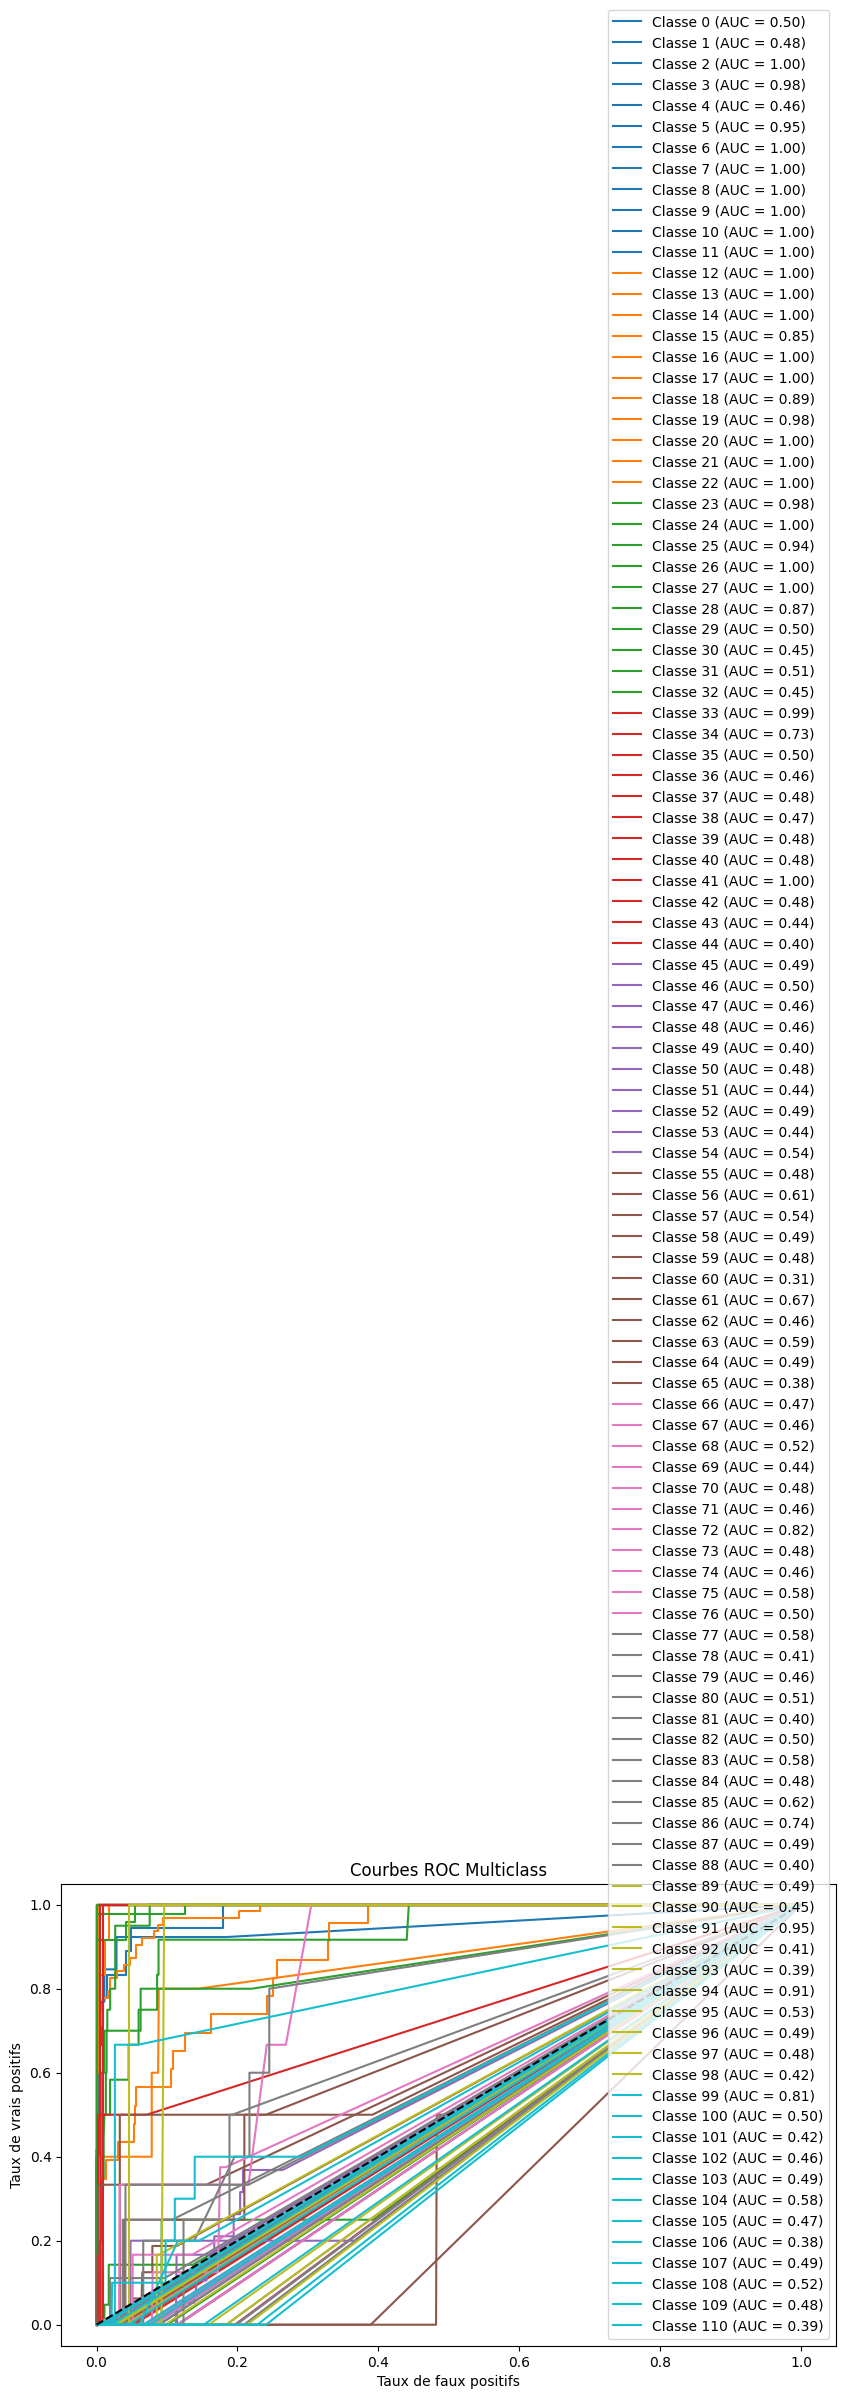

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Supposons que vous avez y_test et y_pred_prob déjà définis
# y_test : vérité de terrain (vecteur de classes)
# y_pred_prob : prédictions de probabilité pour chaque classe (sortie de predict_proba)

# Binariser les labels de y_test pour la classification multiclass
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Vérifier les classes présentes dans y_test et y_pred_prob
unique_y_test = np.unique(y_test)
unique_y_pred = np.unique(np.argmax(y_pred_prob, axis=1))

# Si des classes sont manquantes dans y_pred_prob, ajouter des colonnes de probabilité nulle
missing_classes = set(unique_y_test) - set(unique_y_pred)
if missing_classes:
    for cls in missing_classes:
        # Ajouter une colonne de probabilité nulle pour cette classe
        missing_class_prob = np.zeros((y_pred_prob.shape[0], 1))  # Zéro pour toutes les prédictions
        y_pred_prob = np.hstack((y_pred_prob, missing_class_prob))
    
    # Réorganiser les colonnes de y_pred_prob pour correspondre à l'ordre des classes dans y_test
    y_pred_prob = y_pred_prob[:, np.argsort(np.unique(y_test))]

# Vérification des dimensions
assert y_test_bin.shape[1] == y_pred_prob.shape[1], f"Mismatch dans le nombre de classes: {y_test_bin.shape[1]} vs {y_pred_prob.shape[1]}"

# Initialisation de la figure pour les courbes ROC
plt.figure(figsize=(10, 6))

# Récupérer le nombre de classes
n_classes = y_test_bin.shape[1]

# Palette de couleurs pour les courbes ROC
colors = plt.cm.get_cmap('tab10', n_classes)

# Calculer la courbe ROC pour chaque classe et afficher l'AUC
auc_values = []  # Liste pour stocker les AUC

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])  # Calcul de la courbe ROC
    roc_auc = auc(fpr, tpr)  # Calcul de l'AUC pour chaque classe
    auc_values.append(roc_auc)
    plt.plot(fpr, tpr, color=colors(i), label=f'Classe {i} (AUC = {roc_auc:.2f})')

# Tracer la diagonale (ligne aléatoire)
plt.plot([0, 1], [0, 1], 'k--')

# Ajouter des labels et un titre à la courbe
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC Multiclass')
plt.legend(loc='lower right')

# Afficher l'AUC de chaque classe dans la console
for i, auc_value in enumerate(auc_values):
    print(f"AUC pour la classe {i}: {auc_value:.2f}")

# Sauvegarder la figure en fichier PNG
plt.savefig('roc_curve_multiclass.png')  # Vous pouvez changer le format si vous le souhaitez

# Afficher la figure
plt.show()


### Expliquation:
Plus l'AUC est proche de 1, mieux c'est, ce qui signifie que le modèle est excellent pour séparer les classes. À l'inverse, une AUC proche de 0.5 signifie que le modèle fait des prédictions aléatoires et ne parvient pas à différencier les classes.

### Interprétation
AUC proche de 0.5 (modérée)=>signifie que le modèle ne parvient pas à différencier correctement les classes

AUC faible (< 0.5)==>indique que le modèle est moins performant pour ces classes

AUC = 1.00==>le modèle distingue parfaitement ces classes,
### Résumé :
92 classes avec AUC proche de 0.5.

2 classes avec AUC faible (< 0.5).

21 classes avec AUC parfaite (1.00).

### Etude sue les classes qui ont des AUC Faibles

In [85]:
import pandas as pd

# Charger le fichier Excel
df = pd.read_excel('Stemmed_DATA1.xlsx')
# Trouver les catégories associées aux labels 44 et 60
categories_44_60 = label_encoder.inverse_transform([44, 60])

# Afficher les catégories correspondantes
print("Catégories associées aux labels 44 et 60 :", categories_44_60) 


Catégories associées aux labels 44 et 60 : ['الحقد' 'السلام']


In [87]:
# Afficher le nombre d'instances pour chaque catégorie spécifique
count_44_60 = data['catégorie'].value_counts()

count_specific_categories = count_44_60[['الحقد', 'السلام']]

print("Nombre d'instances pour chaque catégorie :")
print(count_specific_categories)

Nombre d'instances pour chaque catégorie :
catégorie
الحقد     11
السلام     5
Name: count, dtype: int64


### Etude sur les classes avec AUC proche de 0,5

In [89]:
labels_of_interest = [0, 1, 4, 29, 30, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 
                      54, 55, 56, 57, 58, 59, 60, 62, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 
                      80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 
                      104, 105, 106, 107, 108, 109, 110, 112, 114, 115, 117, 119, 120, 121, 122, 123, 125, 126, 
                      128, 130, 132, 134, 135, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 
                      151, 152, 153, 154, 155, 156, 157, 158, 159]

# Vérifier les classes valides dans le label encoder
valid_labels = [label for label in labels_of_interest if label in range(len(label_encoder.classes_))]

# Trouver les catégories associées aux labels valides
categories = label_encoder.inverse_transform(valid_labels)

# Afficher les catégories associées aux labels valides
print("Catégories associées aux labels valides :", categories)

# Compter le nombre d'instances pour chaque catégorie valide dans le jeu de données
instance_counts = data[data['catégorie'].isin(categories)]['catégorie'].value_counts()

# Afficher le nombre d'instances pour chaque catégorie valide
print("\nNombre d'instances pour chaque catégorie valide :")
print(instance_counts)


Catégories associées aux labels valides : [' الحياء' ' الغيرة' 'الأخوة والصداقة' 'التفاؤل' 'التكبر' 'الثرثرة'
 'الجبن' 'الجد والعمل' 'الجزع' 'الجفاء' 'الحب' 'الحسد' 'الحق' 'الحقد'
 'الحكمة' 'الحلم' 'الحياء' 'الخبث' 'الخبرة في الحياة' 'الخداع' 'الخذلان'
 'الخيانة' 'الذكاء' 'الذل' 'الرحمة' 'الرحمة ' 'الرفق' 'السكوت والكلام'
 'السكينة الستر' 'السلام' 'الشجاعة' 'الشكر' 'الصبر' 'الصبر والمواساة'
 'الصداقة' 'الصدق' 'الصمت' 'الطمع' 'الطيبة' 'الظلم' 'العبوس' 'العجب'
 'العدل' 'العدل والإنصاف' 'العدوان' 'العزة والشجاعة' 'العلم والحكمة'
 'العمل والجد' 'الغدر' 'الغش' 'الغضب' 'الغيبة' 'الغيرة' 'الفجور' 'القناعة'
 'القناعة والرضا' 'الكبر' 'الكذب' 'اللامبالاة' 'المحبة'
 'المدح ومكارم الأخلاق' 'المروءة' 'المشورة' 'المن' 'المواساة' 'النزاهة'
 'النشاط' 'النصح' 'النصرة' 'النصيحة' 'النظافة' 'النفاق' 'النميمة' 'الهجر'
 'الورع' 'الوهن' 'حسن السمت' 'حسن الظن' 'رفع الصوت' 'سوء الجوار'
 'سوء الظن' 'طيبة القلب' 'فعل الخير' 'كظم الغيظ']

Nombre d'instances pour chaque catégorie valide :
catégorie
الصبر          

### Etude sur les classes égal à 1

In [90]:
# Définir les nouvelles classes d'intérêt
new_labels_of_interest = [2, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 20, 21, 22, 24, 26, 27, 33, 41, 91]

# Vérifier les classes valides dans le label encoder
valid_new_labels = [label for label in new_labels_of_interest if label in range(len(label_encoder.classes_))]

# Trouver les catégories associées aux labels valides
new_categories = label_encoder.inverse_transform(valid_new_labels)

# Afficher les catégories associées aux labels valides
print("Catégories associées aux labels valides :", new_categories)

# Compter le nombre d'instances pour chaque catégorie valide dans le jeu de données
new_instance_counts = data[data['catégorie'].isin(new_categories)]['catégorie'].value_counts()

# Afficher le nombre d'instances pour chaque catégorie valide
print("\nNombre d'instances pour chaque catégorie valide :")
print(new_instance_counts)

Catégories associées aux labels valides : [' حسن السمت' 'الأمانة' 'الإخلاص' 'الإساءة' 'الإصلاح'
 'الإعراض عن الجاهلين' 'الإنصات' 'الإيثار' 'الاحترام' 'الاعتدال والوسطية'
 'البخل' 'البر' 'التأني الأناة' 'التثبت' 'التجسس' 'التسامح' 'التعالي'
 'التعاون' 'التواضع' 'الحذر' 'القوة']

Nombre d'instances pour chaque catégorie valide :
catégorie
الإعراض عن الجاهلين    511
التأني الأناة          312
البر                   222
الاعتدال والوسطية      211
التثبت                 172
الإيثار                155
التعاون                119
التواضع                102
التسامح                 97
الأمانة                 64
التعالي                 60
التجسس                  56
الاحترام                53
الإصلاح                 52
الإنصات                 30
الإخلاص                 27
البخل                   24
القوة                   18
الحذر                    8
الإساءة                  7
 حسن السمت               1
Name: count, dtype: int64


In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss, f1_score, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import normalize
import numpy as np

# Calculer les poids des classes
class_weights = compute_class_weight('balanced', classes=np.unique(y_encoded), y=y_encoded)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Définir les hyperparamètres pour GridSearch
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'oob_score': [True, False]
}

# Définir le modèle Random Forest
rf = RandomForestClassifier(class_weight=class_weight_dict, random_state=42)

# Initialiser le GridSearch avec StratifiedKFold pour validation croisée
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=kf, n_jobs=-1, verbose=2)

# Appliquer GridSearch avec vos données
grid_search.fit(X, y_encoded)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres trouvés : ", grid_search.best_params_)

# Extraire le modèle optimal
best_rf = grid_search.best_estimator_

# Initialiser les métriques pour la validation croisée
log_losses = []
f1_scores = []
accuracies = []

# Liste de toutes les classes uniques
all_classes = np.unique(y_encoded)

# Validation croisée avec le modèle optimal trouvé par GridSearch
for train_index, test_index in kf.split(X, y_encoded):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Entraînement du modèle optimal
    best_rf.fit(X_train, y_train)

    # Prédictions
    y_pred = best_rf.predict(X_test)
    y_pred_prob = best_rf.predict_proba(X_test)

    # Vérifiez si y_test contient au moins deux classes
    if len(np.unique(y_test)) < 2:
        print("Skipping this fold as y_test contains only one class.")
        continue

    # Normaliser les probabilités
    y_pred_prob_normalized = normalize(y_pred_prob, norm='l1', axis=1)

    # Aligner les probabilités
    y_pred_prob_aligned = np.zeros((y_pred_prob.shape[0], len(all_classes)))
    for i, cls in enumerate(best_rf.classes_):
        cls_index = np.where(all_classes == cls)[0][0]
        y_pred_prob_aligned[:, cls_index] = y_pred_prob_normalized[:, i]

    # Calcul des métriques
    log_losses.append(log_loss(y_test, y_pred_prob_aligned, labels=all_classes))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))
    accuracies.append(accuracy_score(y_test, y_pred))

# Affichage des métriques pour évaluation finale
print("Log Loss moyen : ", np.mean(log_losses))
print("F1 Score moyen : ", np.mean(f1_scores))
print("Précision moyenne : ", np.mean(accuracies))

Fitting 5 folds for each of 3840 candidates, totalling 19200 fits


C:\Users\MSI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\MSI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
9630 fits failed out of a total of 19200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3001 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\MSI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MSI\AppD

Meilleurs paramètres trouvés :  {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200, 'oob_score': True}


C:\Users\MSI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\MSI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\MSI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\MSI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\MSI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classificati

Log Loss moyen :  2.97500157650009
F1 Score moyen :  0.5241142194427457
Précision moyenne :  0.7542


C:\Users\MSI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


C:\Users\MSI\AppData\Local\Temp\ipykernel_23868\293355071.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


AUC pour la classe 0: 0.50
AUC pour la classe 1: 0.48
AUC pour la classe 2: 1.00
AUC pour la classe 3: 0.98
AUC pour la classe 4: 0.46
AUC pour la classe 5: 0.95
AUC pour la classe 6: 1.00
AUC pour la classe 7: 1.00
AUC pour la classe 8: 1.00
AUC pour la classe 9: 1.00
AUC pour la classe 10: 1.00
AUC pour la classe 11: 1.00
AUC pour la classe 12: 1.00
AUC pour la classe 13: 1.00
AUC pour la classe 14: 1.00
AUC pour la classe 15: 0.85
AUC pour la classe 16: 1.00
AUC pour la classe 17: 1.00
AUC pour la classe 18: 0.89
AUC pour la classe 19: 0.98
AUC pour la classe 20: 1.00
AUC pour la classe 21: 1.00
AUC pour la classe 22: 1.00
AUC pour la classe 23: 0.98
AUC pour la classe 24: 1.00
AUC pour la classe 25: 0.94
AUC pour la classe 26: 1.00
AUC pour la classe 27: 1.00
AUC pour la classe 28: 0.87
AUC pour la classe 29: 0.50
AUC pour la classe 30: 0.45
AUC pour la classe 31: 0.51
AUC pour la classe 32: 0.45
AUC pour la classe 33: 0.99
AUC pour la classe 34: 0.73
AUC pour la classe 35: 0.50
AU

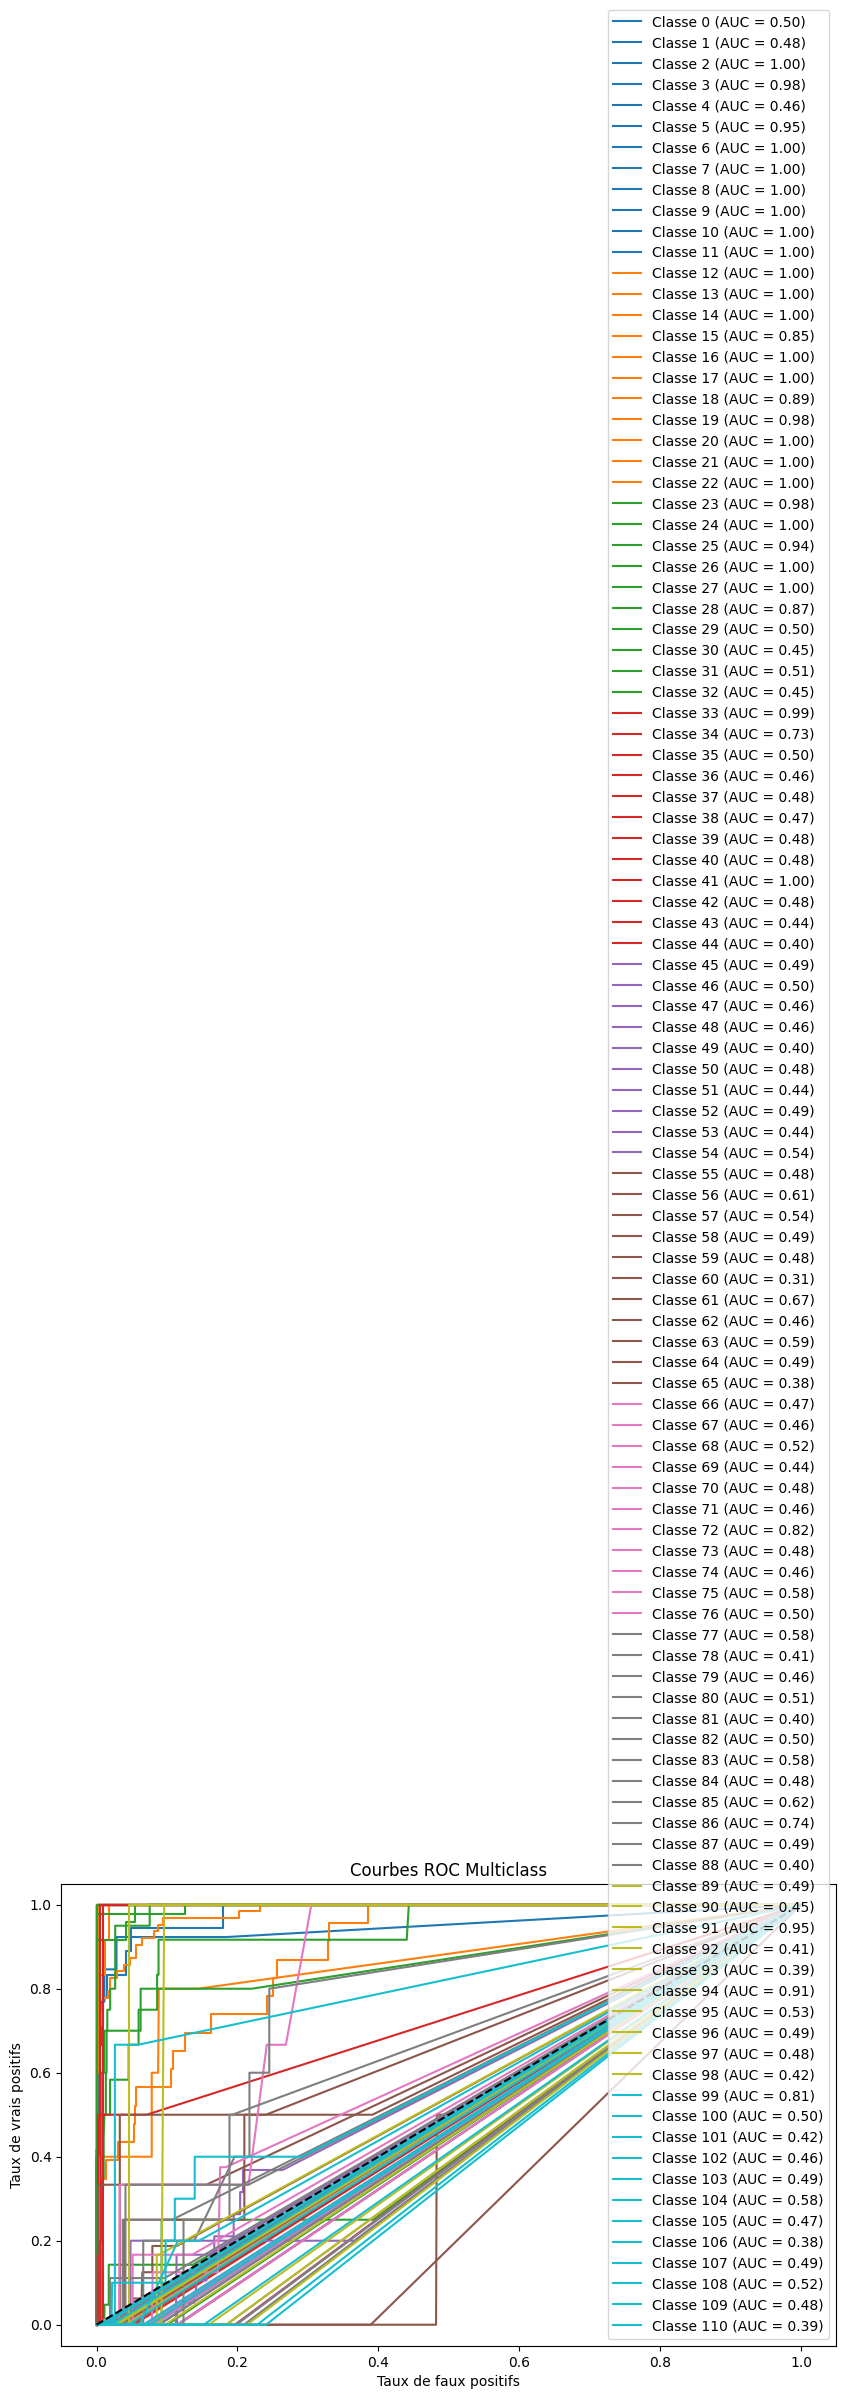

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Supposons que vous avez y_test et y_pred_prob déjà définis
# y_test : vérité de terrain (vecteur de classes)
# y_pred_prob : prédictions de probabilité pour chaque classe (sortie de predict_proba)

# Binariser les labels de y_test pour la classification multiclass
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Vérifier les classes présentes dans y_test et y_pred_prob
unique_y_test = np.unique(y_test)
unique_y_pred = np.unique(np.argmax(y_pred_prob, axis=1))

# Si des classes sont manquantes dans y_pred_prob, ajouter des colonnes de probabilité nulle
missing_classes = set(unique_y_test) - set(unique_y_pred)
if missing_classes:
    for cls in missing_classes:
        # Ajouter une colonne de probabilité nulle pour cette classe
        missing_class_prob = np.zeros((y_pred_prob.shape[0], 1))  # Zéro pour toutes les prédictions
        y_pred_prob = np.hstack((y_pred_prob, missing_class_prob))
    
    # Réorganiser les colonnes de y_pred_prob pour correspondre à l'ordre des classes dans y_test
    y_pred_prob = y_pred_prob[:, np.argsort(np.unique(y_test))]

# Vérification des dimensions
assert y_test_bin.shape[1] == y_pred_prob.shape[1], f"Mismatch dans le nombre de classes: {y_test_bin.shape[1]} vs {y_pred_prob.shape[1]}"

# Initialisation de la figure pour les courbes ROC
plt.figure(figsize=(10, 6))

# Récupérer le nombre de classes
n_classes = y_test_bin.shape[1]

# Palette de couleurs pour les courbes ROC
colors = plt.cm.get_cmap('tab10', n_classes)

# Calculer la courbe ROC pour chaque classe et afficher l'AUC
auc_values = []  # Liste pour stocker les AUC

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])  # Calcul de la courbe ROC
    roc_auc = auc(fpr, tpr)  # Calcul de l'AUC pour chaque classe
    auc_values.append(roc_auc)
    plt.plot(fpr, tpr, color=colors(i), label=f'Classe {i} (AUC = {roc_auc:.2f})')

# Tracer la diagonale (ligne aléatoire)
plt.plot([0, 1], [0, 1], 'k--')

# Ajouter des labels et un titre à la courbe
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC Multiclass')
plt.legend(loc='lower right')

# Afficher l'AUC de chaque classe dans la console
for i, auc_value in enumerate(auc_values):
    print(f"AUC pour la classe {i}: {auc_value:.2f}")

# Sauvegarder la figure en fichier PNG
plt.savefig('roc_curve_multiclass1.png')  # Vous pouvez changer le format si vous le souhaitez

# Afficher la figure
plt.show()
